# Analisis exploratorio de datos ##

Importamos las librerias con las que vamos a trabajar 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

__________
## Análisis del archivo 1: "Penetracion_hogares"
______




En esta celda, comenzaremos nuestro EDA en la hoja "Penetracion_hogares". Este dataset contiene información sobre la penetración de internet cada 100 hogares en diferentes provincias. El objetivo de esta exploración inicial es:

1. Conocer la estructura y el contenido de los datos.
2. Verificar la existencia de datos faltantes o inconsistentes.
3. Obtener estadísticas básicas de la penetración de internet por provincia.

Este análisis servirá como base para identificar patrones y posibles insights sobre la distribución del acceso a internet en cada provincia. A continuación, cargamos los datos y mostramos las primeras filas para tener un vistazo general.


In [2]:
df_penetracion = pd.read_csv('C:/Users/Alberto/Desktop/Mari/PI2/Data-Analytics/Datasets originales/Penetracion_hogares.csv')

In [3]:
# Revisamos si hay valores nulos en el dataset
print(df_penetracion.isnull().sum())



Año                             0
 Trimestre                      0
 Provincia                      0
Accesos por cada 100 hogares    0
dtype: int64


In [4]:
#Verificamos si hay duplicados
print("\nNúmero de filas duplicadas:", df_penetracion.duplicated().sum())



Número de filas duplicadas: 0


In [5]:
# Eliminamos los espacios extra en los nombres de las columnas
df_penetracion.columns = df_penetracion.columns.str.strip()


Resultados: **No hay valores duplicados ni faltantes.**

In [6]:
#Visualizamos el encabezado para ver como están los datos a simple vista
df_penetracion.head()  

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2024,2,Buenos Aires,79.84
1,2024,2,Capital Federal,116.37
2,2024,2,Catamarca,68.81
3,2024,2,Chaco,44.06
4,2024,2,Chubut,86.33


#### Análisis de valores atípicos (Outliers)
Para identificar posibles valores atípicos en nuestro dataset, utilizaremos gráficos de caja (boxplots). Estos gráficos nos permitirán visualizar de manera clara cualquier valor que se desvíe significativamente del resto de los datos. Los outliers pueden representar datos incorrectos, errores de medición o casos específicos que merecen una mayor investigación.

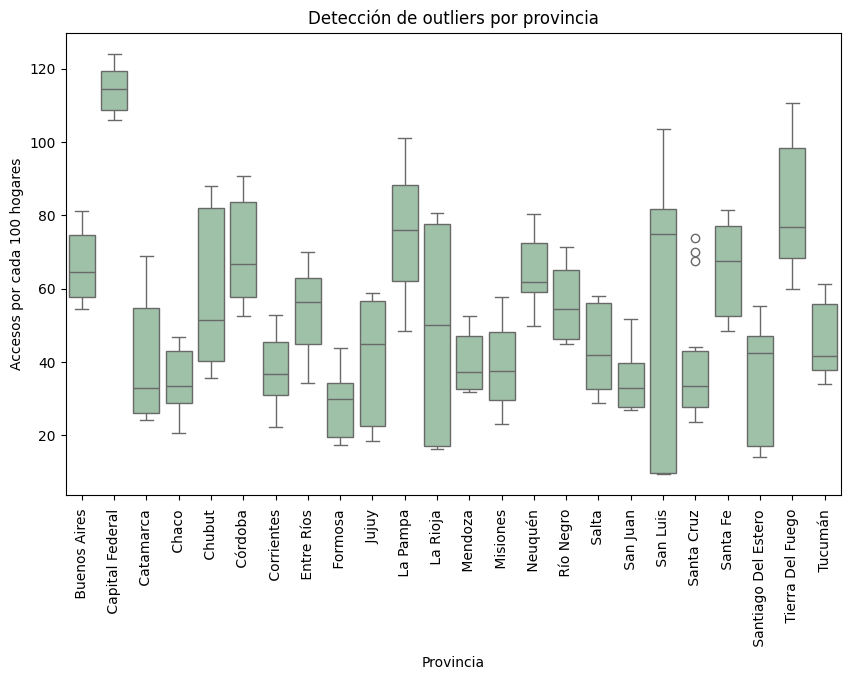

In [7]:
# Código para el gráfico de boxplot
plt.figure(figsize=(10,6))
sns.boxplot(x='Provincia', y='Accesos por cada 100 hogares', data=df_penetracion , color= '#98C7A5')
plt.xticks(rotation=90)
plt.title('Detección de outliers por provincia')
plt.show()

Este código utiliza un gráfico de boxplot para identificar valores atípicos en la variable *Accesos por cada 100 hogares* para cada provincia. En el gráfico, observamos que Santa Cruz presenta valores que sobresalen del rango intercuartílico, lo que sugiere que podrían ser considerados outliers.
Procedemos a realizar una serie de investigaciones para corroborar si realmente son outliers o es un error.

#### Filtrado de los datos de Santa Cruz
Aquí filtramos específicamente los datos de la provincia de Santa Cruz para analizar su comportamiento en términos de accesos por cada 100 hogares. Esto nos permitió identificar un fuerte crecimiento en los últimos trimestres, con valores inusualmente altos.


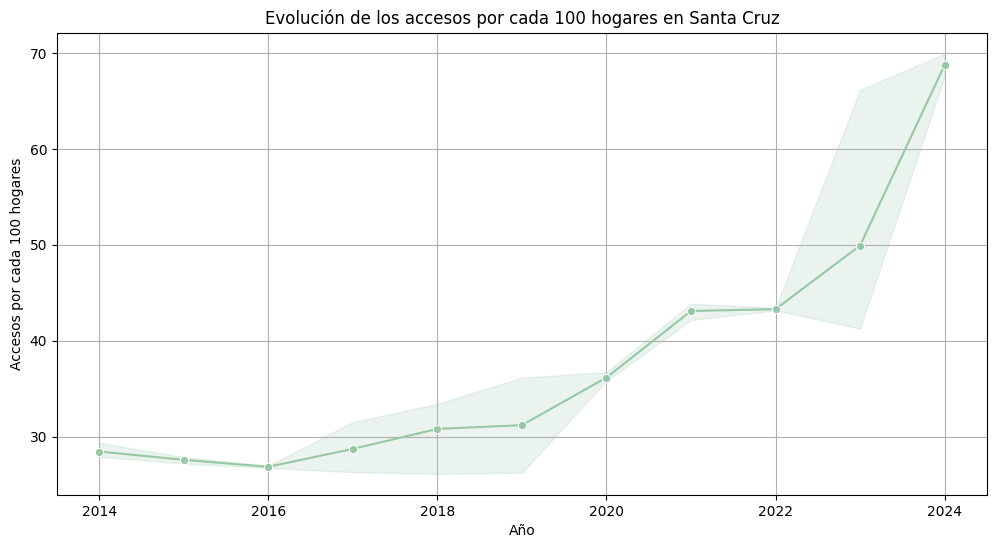

In [8]:
# Filtrar datos de Santa Cruz
santa_cruz_data = df_penetracion[df_penetracion['Provincia'] == ' Santa Cruz ']

# Gráfico de línea para la evolución temporal
plt.figure(figsize=(12, 6))
sns.lineplot(data=santa_cruz_data, x='Año', y='Accesos por cada 100 hogares', marker='o', color='#98C7A5')
plt.title('Evolución de los accesos por cada 100 hogares en Santa Cruz')
plt.xlabel('Año')
plt.ylabel('Accesos por cada 100 hogares')
plt.grid(True)
plt.show()


#### Evolución temporal de Santa Cruz
Generamos un gráfico de líneas que muestra el crecimiento sostenido de la penetración de internet en Santa Cruz desde 2014 hasta 2024. Este análisis destaca un aumento notable a partir de 2022, lo que justifica su consideración como una provincia con comportamiento atípico.


Realizamos los cálculos de los interquartiles para identificar cuales son los valores atípicos:

In [9]:
# Calcular IQR para Santa Cruz
q1 = santa_cruz_data['Accesos por cada 100 hogares'].quantile(0.25)
q3 = santa_cruz_data['Accesos por cada 100 hogares'].quantile(0.75)
iqr = q3 - q1

# Límites para detectar outliers
lower_limit = q1 - 1.5 * iqr
upper_limit = q3 + 1.5 * iqr

# Identificar valores fuera de los límites
outliers = santa_cruz_data[
    (santa_cruz_data['Accesos por cada 100 hogares'] < lower_limit) |
    (santa_cruz_data['Accesos por cada 100 hogares'] > upper_limit)
]

print("Outliers en Santa Cruz:")
print(outliers)


Outliers en Santa Cruz:
     Año  Trimestre     Provincia  Accesos por cada 100 hogares
19  2024          2   Santa Cruz                          69.92
43  2024          1   Santa Cruz                          67.58
67  2023          4   Santa Cruz                          73.75


#### Cálculo de métricas sin Santa Cruz
En este paso, calculamos la media y la mediana del acceso a internet por cada 100 hogares excluyendo a Santa Cruz. Esto nos permitió evaluar el impacto de los valores atípicos de Santa Cruz en las métricas generales. Los resultados indican que su exclusión no afecta significativamente las tendencias generales.


In [10]:
# Analizar media y mediana excluyendo Santa Cruz
sin_santa_cruz = df_penetracion[df_penetracion['Provincia'] != 'Santa Cruz']
mean_sin_santa_cruz = sin_santa_cruz['Accesos por cada 100 hogares'].mean()
median_sin_santa_cruz = sin_santa_cruz['Accesos por cada 100 hogares'].median()

print(f"Media sin Santa Cruz: {mean_sin_santa_cruz:.2f}")
print(f"Mediana sin Santa Cruz: {median_sin_santa_cruz:.2f}")


Media sin Santa Cruz: 52.80
Mediana sin Santa Cruz: 50.13


**Resultado del análisis sin incluir Santa Cruz**
Media sin Santa Cruz: 52.80
Este valor representa el promedio de los accesos por cada 100 hogares cuando se excluyen los datos de Santa Cruz.

Mediana sin Santa Cruz: 50.13
Este valor es el punto medio de los accesos por cada 100 hogares al excluir Santa Cruz, indicando que la distribución de los datos no se ve significativamente afectada por la presencia o ausencia de Santa Cruz.  

Impacto de Santa Cruz en las métricas generales:
Si la media y la mediana se mantienen casi iguales al excluir a Santa Cruz, esto sugiere que los valores de esta provincia no tienen un impacto fuerte en la tendencia general.
Aunque Santa Cruz tenga valores elevados en algunos períodos recientes, no afecta significativamente la tendencia general de los datos, por lo que no se realiza ninguna acción al respecto y continuamos con el análisis.

#### Análisis estadístico de la penetración de internet en hogares

Para analizar la distribución de la penetración de internet en hogares, utilizamos la función `describe()` de Pandas, que nos permite obtener rápidamente las estadísticas básicas (media, mediana, mínimo, máximo, etc.) de la columna. Esto nos proporciona una visión general en una sola línea de código, optimizando el análisis.


In [11]:
df_penetracion.describe()  


,Año,Trimestre,Accesos por cada 100 hogares
count,1000.000000,1000.000000,1000.00000
mean,2018.800000,2.464000,52.79510
std,3.021445,1.114426,24.13493
min,2014.000000,1.000000,9.51000
25%,2016.000000,1.000000,33.95500
50%,2019.000000,2.000000,50.13500
75%,2021.000000,3.000000,67.01000
max,2024.000000,4.000000,124.06000


#### Resumen de los resultados:
- **Media (promedio)**: La penetración promedio de internet en los hogares es de aproximadamente 52.80 accesos por cada 100 hogares, lo cual nos da una referencia general de la cobertura.
- **Mediana**: El valor en el percentil 50 (mediana) es de 50.13 accesos por cada 100 hogares. Esto significa que el 50% de las observaciones están por debajo de este valor y el 50% por encima, indicando una distribución relativamente equilibrada en torno a la media.
- **Rango**:
  - **Mínimo**: El menor valor de penetración registrado es de 9.51 accesos por cada 100 hogares, lo que podría indicar áreas con muy baja cobertura de internet.
  - **Máximo**: El valor más alto es de 124.06 accesos por cada 100 hogares, lo que sugiere que algunas áreas tienen una penetración superior al 100%, probablemente debido a hogares con múltiples accesos.
- **Desviación estándar**: La desviación estándar es de 24.13, lo que indica una variabilidad significativa en la penetración de internet entre las provincias. Esto sugiere desigualdades en la cobertura de internet a nivel provincial.

Este análisis inicial nos permite identificar la disparidad en el acceso a internet entre diferentes regiones, y puede servir como base para profundizar en aquellas áreas que presentan cobertura inferior al promedio nacional.

#### Análisis de la distribución de la penetracion de internet

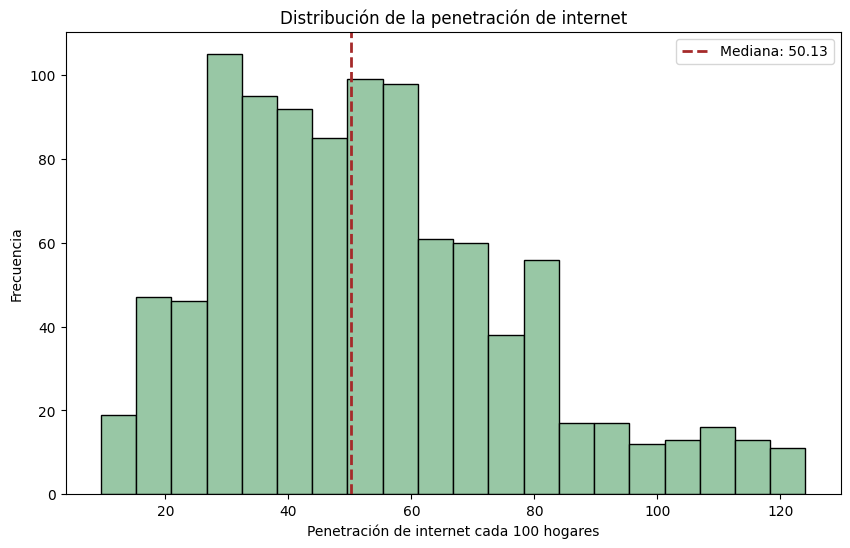

In [12]:
# Calcula la mediana de la penetración de internet
mediana = df_penetracion['Accesos por cada 100 hogares'].median()

# Crea el histograma de la penetración de internet
plt.figure(figsize=(10, 6))
plt.hist(df_penetracion['Accesos por cada 100 hogares'], bins=20, color='#98C7A5', edgecolor='black')

# Agrega una línea vertical en la mediana
plt.axvline(mediana, color='brown', linestyle='dashed', linewidth=2, label=f'Mediana: {mediana:.2f}')

# Títulos y etiquetas
plt.title('Distribución de la penetración de internet')
plt.xlabel('Penetración de internet cada 100 hogares')
plt.ylabel('Frecuencia')

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.show()


Este histograma nos presenta una visión general de cómo se distribuye la penetración de internet en las diferentes localidades. Cada barra representa un rango de penetración de internet por cada 100 hogares, y la altura de la barra indica cuántas localidades caen dentro de ese rango.

**Observaciones:**

**Mayor concentración en rangos medios:** Observamos que la mayoría de las localidades se concentran en rangos de penetración de internet entre 40 y 80 hogares por cada 100. Esto sugiere que existe un grupo significativo de localidades con un nivel de acceso a internet moderado.  
**Dispersión:** También hay un número considerable de localidades con una penetración inferior a 40 hogares por cada 100. Esto indica que existen zonas con un acceso a internet limitado.  
**Menor frecuencia en extremos:** Hay menos localidades con penetración muy baja (por debajo de 20) o muy alta (por encima de 100). Esto sugiere que los casos extremos, ya sea de muy baja o muy alta penetración, son menos frecuentes.

**Conclusiones preliminares:**    

**Desigualdad en el acceso:** El histograma revela una desigualdad en el acceso a internet entre las diferentes localidades. Mientras que algunas tienen una penetración bastante alta, otras presentan niveles considerablemente más bajos.  

**Potencial de crecimiento:** La presencia de localidades con una penetración relativamente baja indica que existe un potencial significativo para expandir el acceso a internet en estas zonas.  

**Necesidad de políticas focalizadas:** Para reducir la brecha digital, es necesario implementar políticas públicas y estrategias específicas dirigidas a las localidades con menor penetración.

#### Comparación de la penetración por provincia

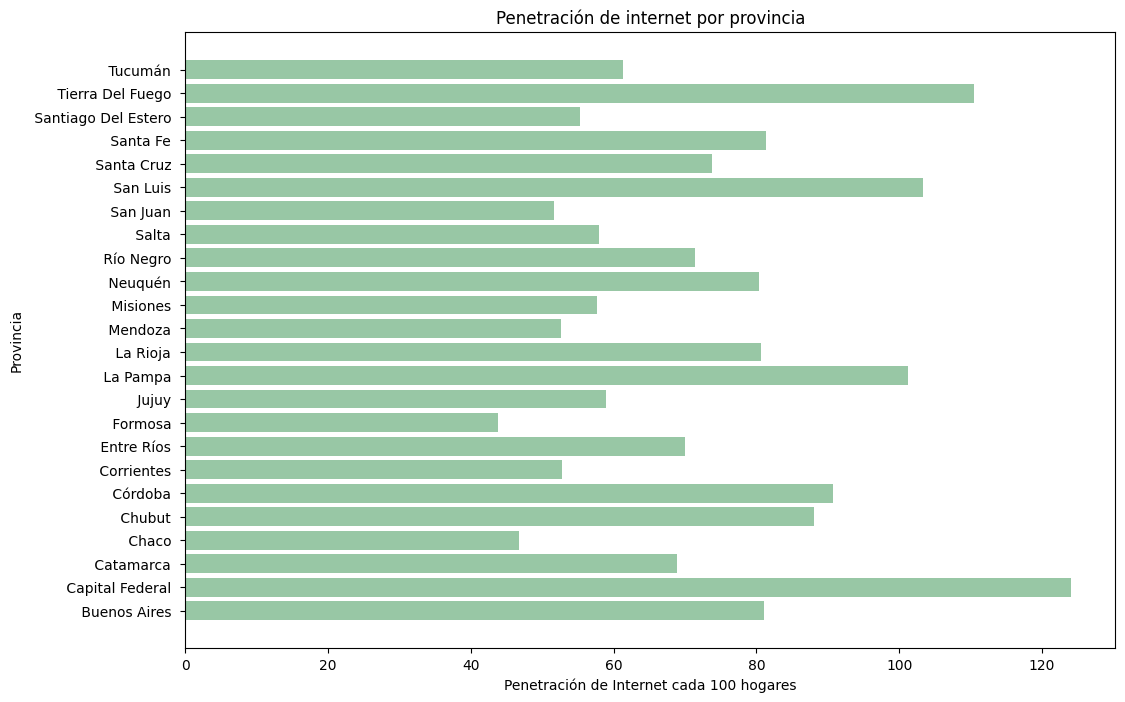

In [13]:
# Gráfico de barras para la penetración de internet por provincia
plt.figure(figsize=(12, 8))
plt.barh(df_penetracion['Provincia'], df_penetracion['Accesos por cada 100 hogares'], color='#98C7A5')
plt.title('Penetración de internet por provincia')
plt.xlabel('Penetración de Internet cada 100 hogares')
plt.ylabel('Provincia')
plt.show()


El gráfico compara la penetración de internet por cada 100 hogares en diversas provincias argentinas, revelando significativas diferencias regionales:

**Alta penetración:** Las provincias como Buenos Aires y Córdoba destacan con una penetración superior al 80%, indicando una mejor infraestructura y acceso a servicios digitales.

**Baja penetración:** Provincias como Formosa y Santiago del Estero presentan tasas inferiores al 50%, lo que sugiere barreras en la infraestructura y desafíos socioeconómicos.

**Disparidad regional:** La diferencia notable entre las provincias con mayor y menor penetración resalta la necesidad de abordar la brecha digital mediante políticas inclusivas y de inversión en infraestructura.

En resumen, la variabilidad en la penetración de internet subraya la importancia de estrategias regionales personalizadas para asegurar un acceso equitativo a la conectividad digital.

#### Análisis de la evolución de la penetración de internet por provincia
**Agrupamiento de provincias por categorías de penetración de internet según la mediana**  

En este paso, las provincias se agrupan en tres categorías de penetración de internet: baja, media y alta. Para definir estas categorías, se utiliza el valor de la mediana de la penetración de internet, permitiendo clasificar las provincias según su nivel relativo de acceso. Esta clasificación ayuda a entender mejor la distribución de la penetración a nivel provincial y facilita el análisis de las regiones con acceso inferior o superior al promedio.





In [14]:
# Calcular la mediana de los accesos
mediana = df_penetracion['Accesos por cada 100 hogares'].median()

# Crear una nueva columna 'Categoría' basada en la mediana
df_penetracion['Categoría'] = df_penetracion['Accesos por cada 100 hogares'].apply(
    lambda x: 'Baja penetración' if x < mediana else ('Alta penetración' if x > mediana else 'Media penetración')
)

# Ver las primeras filas para confirmar la categorización
df_penetracion.head()


,Año,Trimestre,Provincia,Accesos por cada 100 hogares,Categoría
0,2024,2,Buenos Aires,79.84,Alta penetración
1,2024,2,Capital Federal,116.37,Alta penetración
2,2024,2,Catamarca,68.81,Alta penetración
3,2024,2,Chaco,44.06,Baja penetración
4,2024,2,Chubut,86.33,Alta penetración


#### Análisis de la penetración de internet según la mediana:

En este análisis, usamos la mediana para clasificar las provincias en tres categorías de penetración: baja, media y alta penetración. La mediana, al ser menos sensible a valores extremos, nos permite hacer una segmentación más confiable y precisa de las provincias. Este enfoque ayuda a comprender mejor las desigualdades en el acceso a internet, sin que los valores atípicos distorsionen la interpretación.

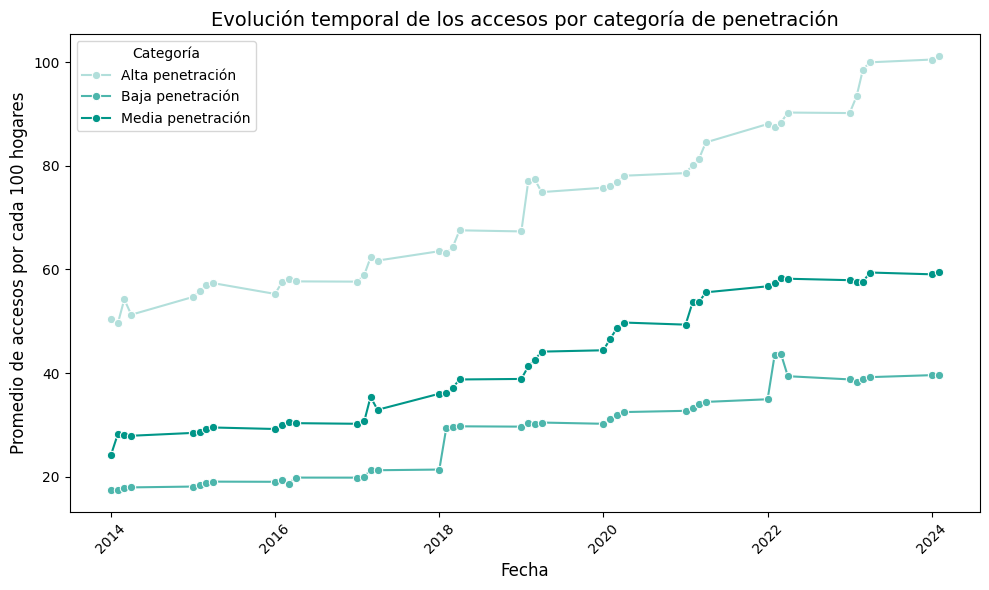

In [15]:

# Se crea la columna 'Fecha' combinando las columnas 'Año' y 'Trimestre'
df_penetracion['Fecha'] = pd.to_datetime(df_penetracion['Año'].astype(str) + '-' + df_penetracion['Trimestre'].astype(str) + '-1')

# Se agrupan los datos por provincia y fecha, calculando el promedio de accesos por cada 100 hogares
df_grouped = df_penetracion.groupby(['Provincia', 'Fecha'])['Accesos por cada 100 hogares'].median().reset_index()

# Se filtra el último trimestre registrado para categorizar las provincias según su penetración actual
ultima_fecha = df_grouped['Fecha'].max()
df_actual = df_grouped[df_grouped['Fecha'] == ultima_fecha]

# Se define una función para asignar categorías según los niveles de penetración
def asignar_categoria(accesos):
    if accesos <= 40:
        return 'Baja penetración'
    elif accesos <= 80:
        return 'Media penetración'
    else:
        return 'Alta penetración'

# Se aplica la función para categorizar las provincias
df_actual['Categoría'] = df_actual['Accesos por cada 100 hogares'].apply(asignar_categoria)

# Se incorpora la categorización al DataFrame original
df_grouped = pd.merge(
    df_grouped,
    df_actual[['Provincia', 'Categoría']],
    on='Provincia',
    how='left'
)

# Se calcula la evolución promedio de accesos por categoría a lo largo del tiempo
df_evolucion = df_grouped.groupby(['Fecha', 'Categoría'])['Accesos por cada 100 hogares'].median().reset_index()

# Definir la paleta de colores degradada con tonos más oscuros
colores_evolucion = ['#B2DFDB', '#4DB6AC', '#009688', '#00796B', '#004D40']  # Verde más oscuro

# Gráfico de línea para la evolución temporal de los accesos por categoría
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=df_evolucion,
    x='Fecha',
    y='Accesos por cada 100 hogares',
    hue='Categoría',
    marker='o',
    palette=colores_evolucion  # Usar la paleta de colores personalizada
)

# Personalizar el gráfico
plt.title('Evolución temporal de los accesos por categoría de penetración', fontsize=14)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Promedio de accesos por cada 100 hogares', fontsize=12)
plt.legend(title='Categoría', fontsize=10)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()  # Ajustar el espacio para evitar solapamientos
plt.show()




La evolución temporal de la penetración de internet revela una tendencia al alza sostenida en todas las categorías analizadas. Las regiones con mayor penetración inicial muestran un crecimiento más acelerado, sugiriendo una dinámica de adopción más rápida. Sin embargo, se identifican períodos de estabilización, lo que podría indicar la influencia de factores externos en la tasa de crecimiento.

#### Filtrado de provincias con baja penetración de internet

Para finalizar el análisis del primer archivo, se identifican y filtran las provincias que tienen baja penetración de acceso a internet, basándonos en el número de accesos por cada 100 hogares. El análisis se enfoca en entender cómo estas provincias han evolucionado a lo largo del tiempo.

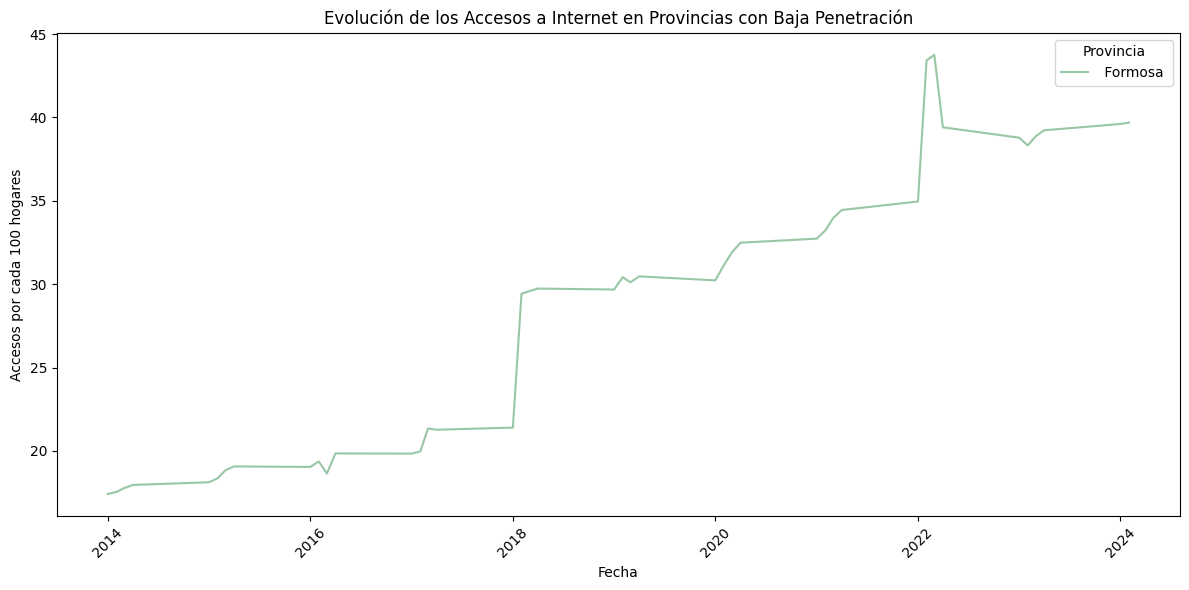

In [16]:
# Filtrar las provincias con baja penetración
provincias_baja_penetracion = df_grouped[df_grouped['Categoría'] == 'Baja penetración']

# Crear el gráfico de línea para la evolución de los accesos a internet en provincias de baja penetración
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=provincias_baja_penetracion,
    x='Fecha',
    y='Accesos por cada 100 hogares',
    hue='Provincia',
    palette=['#98C7A5']  # Aquí aplicas el verde bosque claro
)

# Personalizar el gráfico
plt.title('Evolución de los Accesos a Internet en Provincias con Baja Penetración')
plt.xlabel('Fecha')
plt.ylabel('Accesos por cada 100 hogares')
plt.xticks(rotation=45)
plt.legend(title='Provincia')
plt.tight_layout()

# Mostrar el gráfico
plt.show()


#98C7A5


El gráfico muestra la evolución de los accesos a internet en la provincia de Formosa, indicando un crecimiento gradual desde 2014 hasta 2024. Se observan picos notables alrededor de 2018 y 2020, lo que sugiere la implementación de políticas efectivas o mejoras en la infraestructura de conectividad durante esos años.


____
## Análisis del archivo 2: "Accesos_tecnologia_localidad"
___


Procedemos a cargar el archivo y chequear nulos, duplicados , eliminar espacios en blanco de los nombres de los campos  y hacer un paneo rapido de cómo están los datos

In [17]:
df_accesos= pd.read_csv('C:/Users/Alberto/Desktop/Mari/PI2/Data-Analytics/Datasets originales/Accesos_tecnologia_localidad.csv')


In [18]:
# Revisamos si hay valores nulos en el dataset
print(df_accesos.isnull().sum())


Provincia     0
Partido       0
Localidad     0
Tecnologia    0
Link Indec    0
Accesos       6
dtype: int64


Al observar que tenemos 6 valores nulos en la columna "Accesos", procedemos a ver en detalle estas filas y tomar una decisión, de ser necesaria.

In [19]:
# Filtrar y mostrar las filas donde "Accesos" tiene valores nulos
filas_nulas = df_accesos[df_accesos["Accesos"].isnull()]

print("Filas con valores nulos en 'Accesos':")
print(filas_nulas)


Filas con valores nulos en 'Accesos':
                Provincia     Partido         Localidad Tecnologia Link Indec  \
3755           CORRIENTES   Ituzaingó  Colonia Liebig's      Otros   18084010   
4101           ENTRE RIOS        Tala  Rosario del Tala      Otros   30091100   
5744                SALTA    Cafayate          Tolombón      Otros   66021020   
6005                SALTA  San Carlos           Animaná      Otros   66154020   
6010                SALTA  San Carlos        San Carlos      Otros   66154040   
7372  SANTIAGO DEL ESTERO       Choya             Frías      Otros   86063040   

     Accesos  
3755     NaN  
4101     NaN  
5744     NaN  
6005     NaN  
6010     NaN  
7372     NaN  


Los valores nulos pertenecen a la tecnología "Otros" y no representan un aporte significativo a nuestro análisis, por lo que se eliminan del mismo.

In [20]:
# Eliminar las filas que tienen valores nulos en la columna "Accesos"
df_accesos = df_accesos.dropna(subset=["Accesos"])



In [21]:
#Verificamos si hay duplicados
print("\nNúmero de filas duplicadas:", df_accesos.duplicated().sum())


Número de filas duplicadas: 0


In [22]:
# Eliminamos los espacios extra en los nombres de las columnas
df_accesos.columns = df_accesos.columns.str.strip()

# Eliminamos los espacios extra en los datos de todas las columnas
df_accesos = df_accesos.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [23]:
df_accesos.head()

,Provincia,Partido,Localidad,Tecnologia,Link Indec,Accesos
0,BUENOS AIRES,25 de Mayo,25 de Mayo,ADSL,6854100,755
1,BUENOS AIRES,25 de Mayo,25 de Mayo,CABLEMODEM,6854100,"4,600"
2,BUENOS AIRES,25 de Mayo,25 de Mayo,FIBRA OPTICA,6854100,2
3,BUENOS AIRES,25 de Mayo,25 de Mayo,SATELITAL,6854100,742
4,BUENOS AIRES,25 de Mayo,25 de Mayo,WIRELESS,6854100,727


Eliminamos la columna Link Indec porque no la vamos a utilizar en nuestro análisis.

In [24]:
# Elimina la columna 'Link Indec' que no se va a utilizar
df_accesos = df_accesos.drop(columns=["Link Indec"])

# Verifica que la columna fue eliminada
df_accesos.head()


,Provincia,Partido,Localidad,Tecnologia,Accesos
0,BUENOS AIRES,25 de Mayo,25 de Mayo,ADSL,755
1,BUENOS AIRES,25 de Mayo,25 de Mayo,CABLEMODEM,"4,600"
2,BUENOS AIRES,25 de Mayo,25 de Mayo,FIBRA OPTICA,2
3,BUENOS AIRES,25 de Mayo,25 de Mayo,SATELITAL,742
4,BUENOS AIRES,25 de Mayo,25 de Mayo,WIRELESS,727


#### Análisis estadístico con `describe()`

Esto nos permitirá obtener un resumen general de los datos numéricos, lo que incluye estadísticas como el promedio, el mínimo, el máximo, la desviación estándar, y los percentiles. Esto puede darnos una visión rápida de la distribución de los datos y detectar posibles valores atípicos o anomalías. En este caso, del campo "Accesos" que es la variable cuantitativa discreta  del dataset.

In [25]:
# Análisis estadístico completo de la columnas numérica
print(df_accesos['Accesos'].describe())


count     7747
unique    1884
top          1
freq      1191
Name: Accesos, dtype: object


Se observa que nos arroja un resultado como si se estuviera analizando una variable categórica por lo que procedemos a hacer una serie de chequeos para saber cual es el error.

In [26]:
print(df_accesos['Accesos'].dtype)

object


Al revisar el tipo de dato nos arroja object, lo que significa que nos está tomando la columna como tipo str, solucionamos esto transformando los valores a numéricos.

In [27]:
print(df_accesos['Accesos'].unique())

['755' '4,600' '2' ... '1,052' '12,871' '17,950']


Identificamos que los valores tienen un espacio en blanco al final, procedemos a eliminarlos para poder analizar de manera efectiva la variable.

In [28]:
# Eliminar los espacios al principio y al final de cada valor en la columna 'Accesos'
df_accesos['Accesos'] = df_accesos['Accesos'].str.strip()


In [29]:
# Verificamos si hay comas en los valores de la columna 'Accesos'
df_accesos['Accesos'].str.contains(',').any()
# Identificamos las filas donde la columna 'Accesos' contiene comas
df_accesos[df_accesos['Accesos'].str.contains(',')]


,Provincia,Partido,Localidad,Tecnologia,Accesos
1,BUENOS AIRES,25 de Mayo,25 de Mayo,CABLEMODEM,"4,600"
20,BUENOS AIRES,9 de Julio,9 de Julio,ADSL,"4,241"
21,BUENOS AIRES,9 de Julio,9 de Julio,CABLEMODEM,"3,463"
23,BUENOS AIRES,9 de Julio,9 de Julio,FIBRA OPTICA,"6,238"
38,BUENOS AIRES,Adolfo Alsina,Carhué,FIBRA OPTICA,"1,417"
...,...,...,...,...,...
7712,TUCUMAN,Río Chico,Aguilares,ADSL,"1,052"
7734,TUCUMAN,Tafí Viejo,Tafí Viejo,ADSL,"1,807"
7736,TUCUMAN,Tafí Viejo,Tafí Viejo,FIBRA OPTICA,"12,871"
7740,TUCUMAN,Tafí Viejo,Villa Mariano Moreno - El Colmenar,FIBRA OPTICA,"7,644"


Como la coma se utiliza como separador de miles, procedemos a cambiarlas por puntos y convertir la columna en variable numérica para poder aplicar la funcion `describe()` correctamente.

In [30]:
# Reemplaza comas por puntos en la columna 'Accesos'
df_accesos['Accesos'] = df_accesos['Accesos'].str.replace(',', '.')
# Convertimos la columna 'Accesos' a tipo numérico (float)
df_accesos['Accesos'] = pd.to_numeric(df_accesos['Accesos'], errors='coerce')


Una vez realizadas las modificaciones, aplicamos la función nuevamente

In [31]:
print(df_accesos['Accesos'].describe())

count    7746.000000
mean      112.143070
std       198.957412
min         0.000000
25%         2.000000
50%        14.926500
75%       119.000000
max       998.000000
Name: Accesos, dtype: float64


- **Total de registros**: 7,746.  
- **Media**: 112.14 accesos por localidad.  
- **Desviación estándar**: 198.96 accesos, indicando una alta variabilidad.  
- **Valor mínimo**: 0 accesos, lo que implica localidades sin acceso.  
- **Percentiles**:  
  - 25% de las localidades tienen 2 accesos o menos.  
  - 50% tienen menos de 14.93 accesos (mediana).  
  - 75% tienen menos de 119 accesos.  
- **Valor máximo**: 998 accesos en una localidad.  

Esto nos da un panorama general sobre la distribución de los accesos a tecnologías en distintas localidades.  


#### Tratamiento de outliers  
Dado que estamos analizando accesos a tecnologías por provincias, los números elevados pueden ser indicativos de una población grande o de un acceso más común en ciertas zonas, lo cual es relevante para el análisis.

In [32]:
Q1 = df_accesos['Accesos'].quantile(0.25)
Q3 = df_accesos['Accesos'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para los outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificar los outliers
outliers = df_accesos[(df_accesos['Accesos'] < limite_inferior) | (df_accesos['Accesos'] > limite_superior)]

# Mostrar los outliers encontrados
print(outliers)



         Provincia         Partido  \
0     BUENOS AIRES      25 de Mayo   
3     BUENOS AIRES      25 de Mayo   
4     BUENOS AIRES      25 de Mayo   
11    BUENOS AIRES      25 de Mayo   
12    BUENOS AIRES      25 de Mayo   
...            ...             ...   
7730       TUCUMAN  Tafí del Valle   
7733       TUCUMAN      Tafí Viejo   
7735       TUCUMAN      Tafí Viejo   
7741       TUCUMAN         Trancas   
7745       TUCUMAN     Yerba Buena   

                                              Localidad    Tecnologia  Accesos  
0                                            25 de Mayo          ADSL    755.0  
3                                            25 de Mayo     SATELITAL    742.0  
4                                            25 de Mayo      WIRELESS    727.0  
11                               Norberto de la Riestra    CABLEMODEM    782.0  
12                               Norberto de la Riestra  FIBRA OPTICA    496.0  
...                                                 ...  

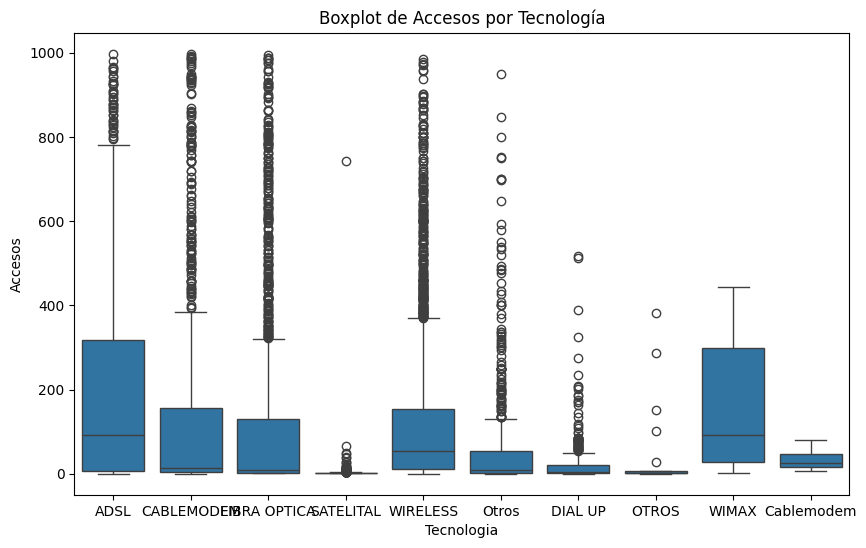

In [33]:
# Crear el boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Tecnologia', y='Accesos', data=df_accesos)
plt.title('Boxplot de Accesos por Tecnología')
plt.show()


El gráfico de caja y bigotes muestra la distribución de los accesos a internet por diferentes tecnologías, incluyendo ADSL, Cablemodem, Fibra Óptica, Satelital, Wireless, Otros, Dial-Up y WiMAX. Los puntos fuera de las cajas representan valores atípicos (outliers), indicando datos que son significativamente diferentes del resto.
Se identifican inconsistencias en las tecnologías, por lo que procedemos a realizar la normalización.

In [34]:
# Convertimos todos los valores de la columna 'Tecnologia' a mayúsculas
df_accesos['Tecnologia'] = df_accesos['Tecnologia'].str.upper()

# Revisamos los valores únicos después de normalizar
print("Valores únicos después de normalizar:", df_accesos['Tecnologia'].unique())

Valores únicos después de normalizar: ['ADSL' 'CABLEMODEM' 'FIBRA OPTICA' 'SATELITAL' 'WIRELESS' 'OTROS'
 'DIAL UP' 'WIMAX']


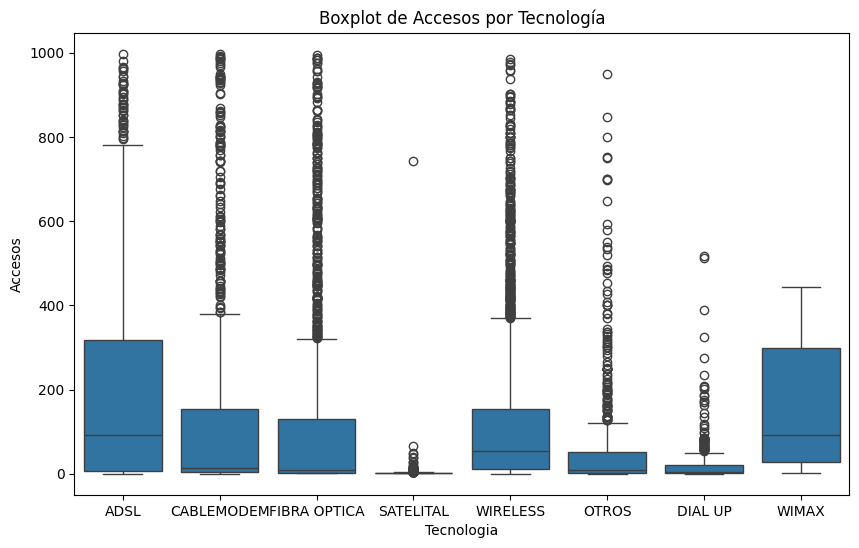

In [35]:
# Crear el boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Tecnologia', y='Accesos', data=df_accesos)
plt.title('Boxplot de Accesos por Tecnología')
plt.show()

Chequeamos que se corrigieron los errores.

### Análisis de la distribución de accesos por tecnología 

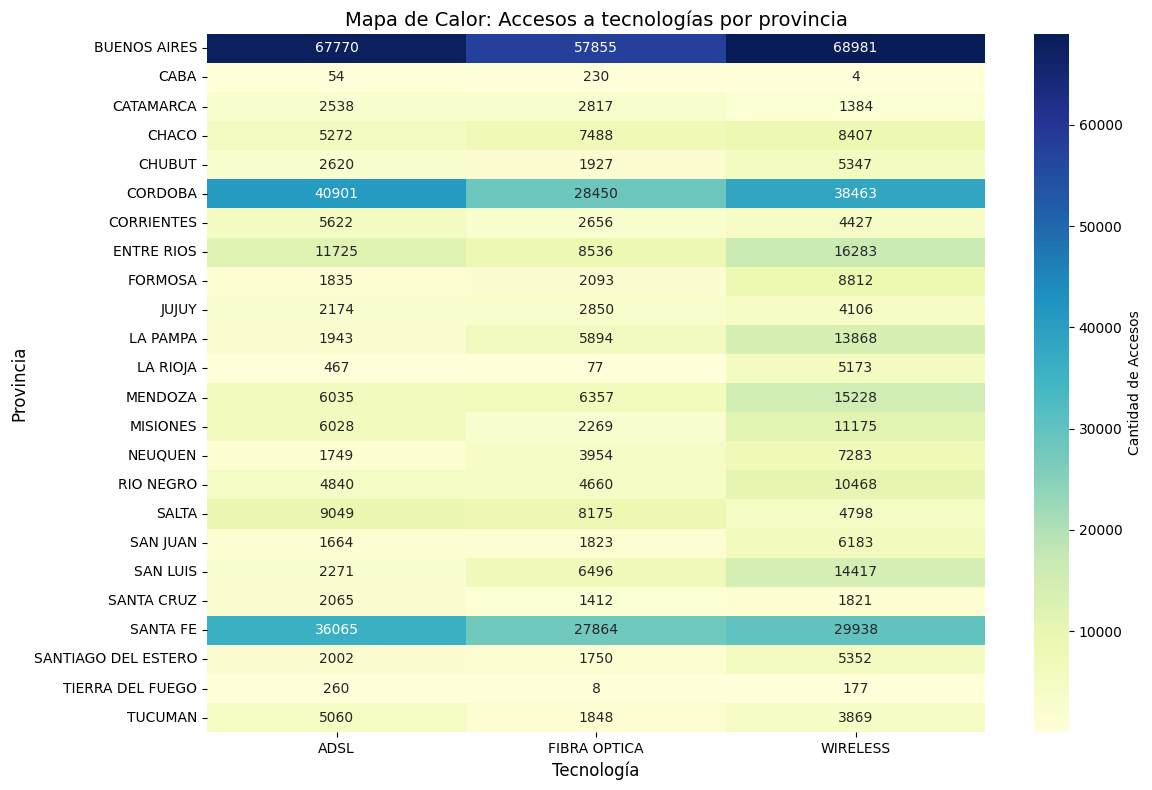

In [36]:
# Filtramos las tecnologías más usadas
tecnologias_populares = ['ADSL', 'FIBRA OPTICA', 'WIRELESS']
df_filtrado = df_accesos[df_accesos['Tecnologia'].isin(tecnologias_populares)]


# Pivotar los datos para preparar el mapa de calor
heatmap_data = df_filtrado.pivot_table(
    index='Provincia',
    columns='Tecnologia',
    values='Accesos',
    aggfunc='sum'
).fillna(0)

# Crear el mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(
    heatmap_data,
    annot=True,  # Mostrar los valores en cada celda
    fmt='.0f',  # Formato de los números
    cmap='YlGnBu',  # Colores del mapa de calor
    cbar_kws={'label': 'Cantidad de Accesos'}
)

# Ajustar título y etiquetas
plt.title('Mapa de Calor: Accesos a tecnologías por provincia', fontsize=14)
plt.xlabel('Tecnología', fontsize=12)
plt.ylabel('Provincia', fontsize=12)

# Mostrar el gráfico
plt.tight_layout()
plt.show()




Exploramos cómo se distribuyen los accesos entre las distintas tecnologías (ADSL, Cablemodem, Fibra Óptica, etc.).

In [37]:
# Conteo de accesos por tipo de tecnología
tecnologia_acc = df_accesos.groupby('Tecnologia')['Accesos'].sum().reset_index()
# Ordenando de mayor a menor número de accesos
tecnologia_acc_ordenado = tecnologia_acc.sort_values(by='Accesos', ascending=False)
print(tecnologia_acc_ordenado)



     Tecnologia     Accesos
7      WIRELESS  285962.542
0          ADSL  220008.996
3  FIBRA OPTICA  187487.457
1    CABLEMODEM  120777.552
4         OTROS   39510.621
2       DIAL UP    9745.050
5     SATELITAL    2930.000
6         WIMAX    2238.000


Observamos las tecnologías utilizadas para accesos a Internet junto con su promedio de accesos. Se destacan tecnologías como `WIRELESS`, `FIBRA OPTICA`, y `ADSL`, con los mayores valores promedio de accesos, mientras que tecnologías como `DIAL UP`, `SATELITAL`, y `WIMAX` tienen promedios significativamente menores. 


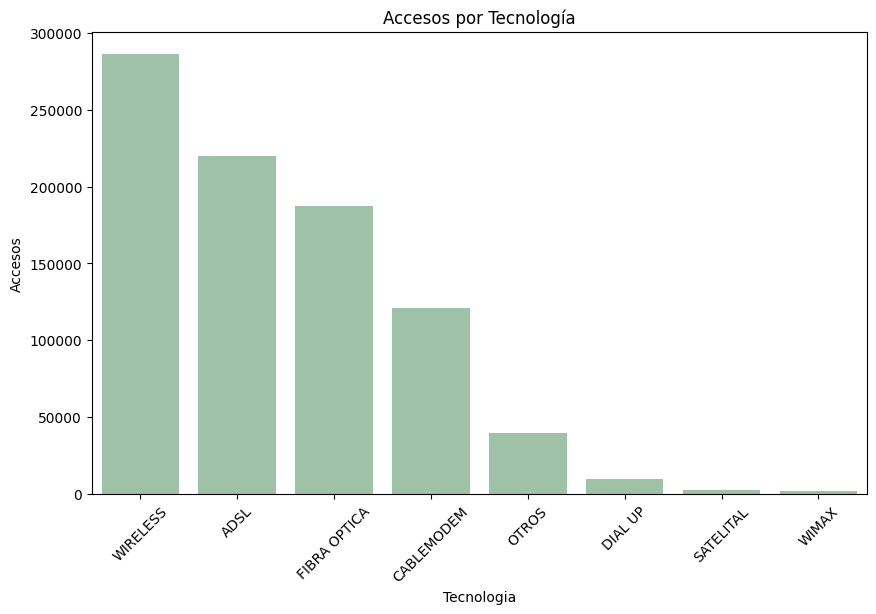

In [38]:
# Agrupar los datos por tecnología y sumar los accesos
accesos_por_tecnologia = df_accesos.groupby('Tecnologia')['Accesos'].sum().reset_index()

# Ordenar por la cantidad total de accesos (opcional)
accesos_por_tecnologia = accesos_por_tecnologia.sort_values(by='Accesos', ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='Tecnologia', y='Accesos', data=accesos_por_tecnologia, color="#98C7A5")
plt.title('Accesos por Tecnología')
plt.xticks(rotation=45)
plt.show()


El análisis de los datos de acceso a internet revela que la tecnología WIRELESS domina el mercado. Es importante destacar el crecimiento de FIBRA OPTICA y la disminución gradual de tecnologías más antiguas como DIAL UP.

#### Mapa de calor de accesos a internet por tecnología y provincia

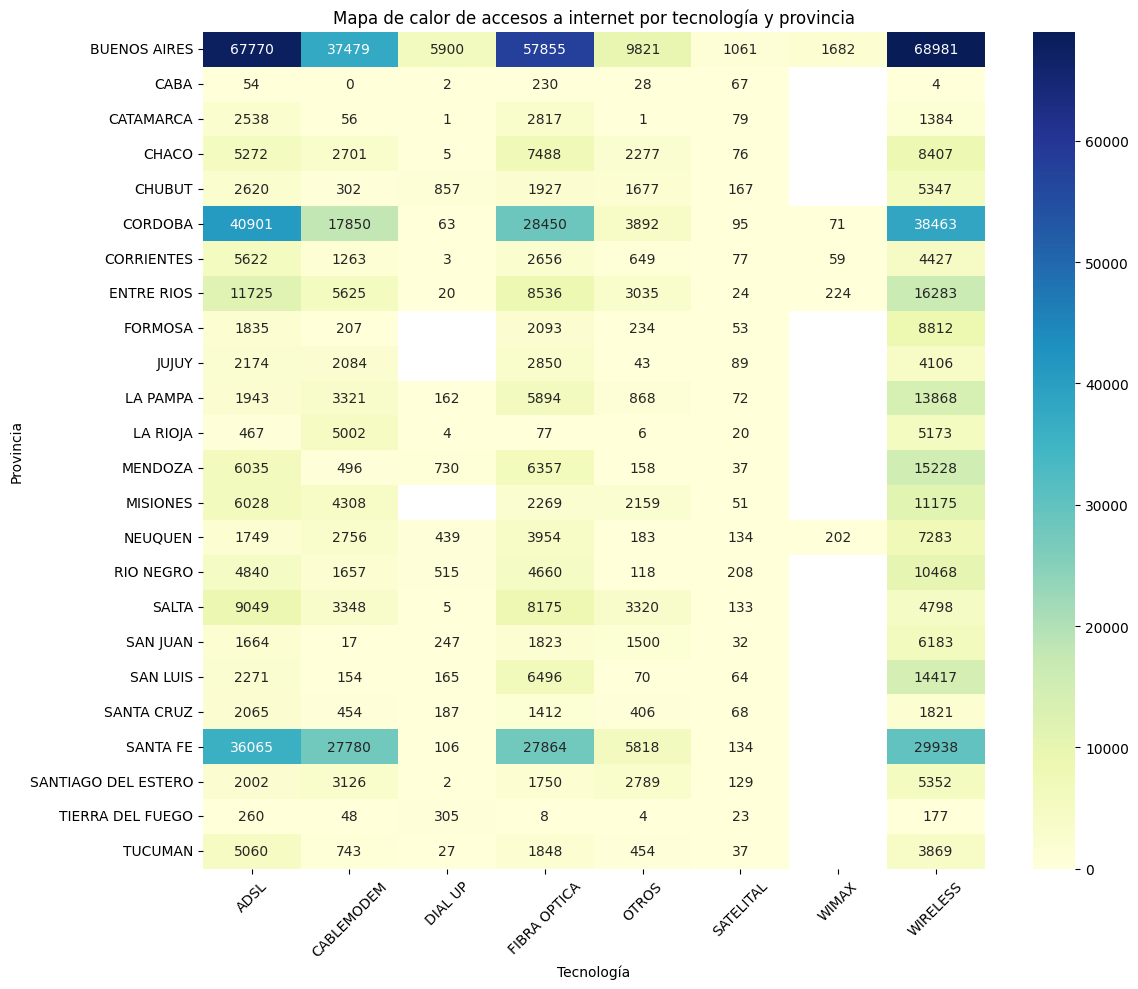

In [39]:
# Crea una tabla pivote para el heatmap
pivot_table = df_accesos.pivot_table(values='Accesos', index='Provincia', columns='Tecnologia', aggfunc='sum')

# Crea el heatmap
plt.figure(figsize=(12,10))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='.0f')
plt.title('Mapa de calor de accesos a internet por tecnología y provincia')
plt.xlabel('Tecnología')
plt.ylabel('Provincia')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




El gráfico presentado muestra la distribución del acceso a diferentes tecnologías de internet en las provincias de Argentina. Las tecnologías incluidas son ADSL, Cablemodem, Dial-Up, Fibra Óptica, Otros, Satelital, WiMAX y Wireless. Los datos están representados en una tabla de calor, donde los colores indican la cantidad de accesos, siendo más oscuro a medida que aumenta el número de accesos.

- Buenos Aires, Córdoba y Santa Fe tienen los mayores accesos en casi todas las tecnologías.
- La fibra óptica, el cablemodem y wireless son las tecnologías con mayor penetración en la mayoría de las provincias.
- Provincias como La Rioja y Formosa tienen un acceso significativamente menor en comparación con otras.

Este análisis es relevante para identificar las disparidades en el acceso a internet en diferentes regiones y puede ser útil para la toma de decisiones en políticas de infraestructura tecnológica.



#### Matriz de correlación de accesos a tecnologías


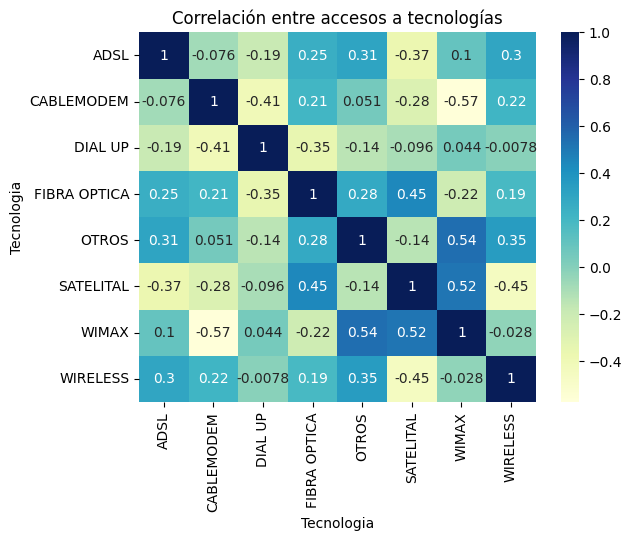

In [40]:
tech_access_data = df_accesos.pivot_table(index='Provincia', columns='Tecnologia', values='Accesos')
corr = tech_access_data.corr()
sns.heatmap(corr, annot=True, cmap='YlGnBu')
plt.title('Correlación entre accesos a tecnologías')
plt.show()


El gráfico muestra una matriz de correlación entre diferentes tecnologías de acceso a internet en distintas provincias. Los valores de correlación varían entre -1 y 1, donde 1 indica una correlación positiva perfecta, -1 una correlación negativa perfecta y 0 ninguna correlación. Por ejemplo, la correlación entre "ADSL" y "Cablemodem" es de -0.076, indicando una correlación negativa muy débil.

#### Conclusión  
La matriz de correlación revela relaciones significativas entre diferentes tecnologías de acceso a internet en las provincias. Se observan correlaciones positivas entre tecnologías como satelital y WiMAX, indicando que estas tienden a coexistir. Por otro lado, las correlaciones negativas entre tecnologías como dial-up y fibra óptica sugieren una transición de tecnologías más antiguas a más modernas en ciertas provincias. Este análisis es crucial para dirigir esfuerzos e inversiones hacia el desarrollo de infraestructuras que promuevan un acceso más equitativo y avanzado a internet en todo el país.


Nos vamos a centrar en las tecnologías con mayor potencial de crecimiento y vamos a analizar las provincias que menos accesos tengan, para identificar posibles causas y poder realizar las recomendaciones pertinentes.

In [41]:
# Calcula la cantidad total de accesos por tecnología para identificar las más populares
tecnologias_mas_usadas = df_accesos.groupby('Tecnologia')['Accesos'].sum().reset_index()

# Ordenar de mayor a menor
tecnologias_mas_usadas_sorted = tecnologias_mas_usadas.sort_values(by='Accesos', ascending=False)

# Muestra las tecnologías más usadas
print(tecnologias_mas_usadas_sorted.head())


     Tecnologia     Accesos
7      WIRELESS  285962.542
0          ADSL  220008.996
3  FIBRA OPTICA  187487.457
1    CABLEMODEM  120777.552
4         OTROS   39510.621


In [42]:
# Filtra el DataFrame para que solo contenga las tecnologías más populares
tecnologias_frecuentes = tecnologias_mas_usadas_sorted['Tecnologia'].head(3).tolist()  # Selecciona las 3 tecnologías más populares
df_accesos_filtrado = df_accesos[df_accesos['Tecnologia'].isin(tecnologias_frecuentes)]

# Muestra las primeras filas del DataFrame filtrado
print(df_accesos_filtrado.head())


      Provincia     Partido   Localidad    Tecnologia  Accesos
0  BUENOS AIRES  25 de Mayo  25 de Mayo          ADSL    755.0
2  BUENOS AIRES  25 de Mayo  25 de Mayo  FIBRA OPTICA      2.0
4  BUENOS AIRES  25 de Mayo  25 de Mayo      WIRELESS    727.0
5  BUENOS AIRES  25 de Mayo   Del Valle          ADSL    181.0
8  BUENOS AIRES  25 de Mayo   Ernestina          ADSL     75.0


In [43]:
# Calcula los accesos promedio por provincia y tecnología filtrada
accesos_promedio = df_accesos_filtrado.groupby(['Provincia', 'Tecnologia'])['Accesos'].mean().reset_index()

# Ordena por acceso promedio
accesos_promedio_sorted = accesos_promedio.sort_values(by='Accesos', ascending=True)

# Muestra las primeras provincias con menos accesos
print(accesos_promedio_sorted.head(5))


              Provincia    Tecnologia    Accesos
67     TIERRA DEL FUEGO  FIBRA OPTICA   1.536000
34             LA RIOJA  FIBRA OPTICA   2.491613
5                  CABA      WIRELESS   4.493000
64  SANTIAGO DEL ESTERO  FIBRA OPTICA  23.976521
8             CATAMARCA      WIRELESS  40.705882


El análisis de los datos de acceso a tecnologías revela una brecha digital significativa entre las provincias. Se recomienda priorizar la inversión en infraestructura de telecomunicaciones en provincias como Tierra del Fuego y La Rioja, donde la penetración de la fibra óptica es menor.

El siguiente gráfico presenta una comparación visual de la cantidad promedio de accesos a tres tecnologías (Fibra Óptica, Wireless y ADSL) distribuidas por provincia. Se observa una variabilidad significativa en los niveles de acceso entre las distintas provincias y tecnologías.  

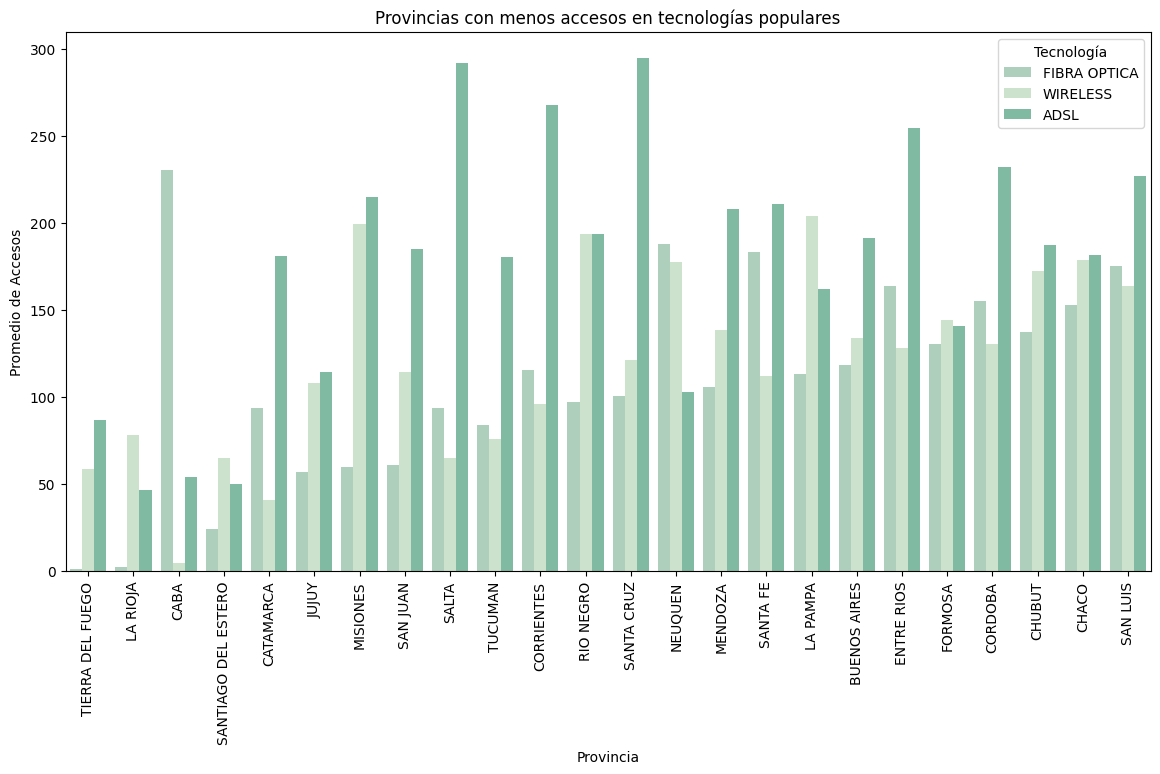

In [44]:
# Definir los colores en tonos de verde claro
colores_verde_claro = ['#A8D5BA', '#C8E6C9', '#77C4A3', '#B8E994']

# Gráfico de barras para comparar accesos por provincia y tecnología
plt.figure(figsize=(14, 7))
sns.barplot(data=accesos_promedio_sorted, x='Provincia', y='Accesos', hue='Tecnologia', ci=None, palette=colores_verde_claro)
plt.title('Provincias con menos accesos en tecnologías populares')
plt.xlabel('Provincia')
plt.ylabel('Promedio de Accesos')
plt.xticks(rotation=90)
plt.legend(title='Tecnología')
plt.show()


El gráfico muestra una clara disparidad en el acceso a internet entre las provincias argentinas. Se identifican varias provincias con bajo nivel de conectividad, representando un mercado potencial para la expansión de servicios. Se recomienda priorizar la inversión en infraestructura en estas regiones, considerando factores como la densidad poblacional y la demanda de servicios.

____
## Análisis del archivo 3: "Accesos_tecnologia"
___

In [45]:
df_tecno= pd.read_csv('C:/Users/Alberto/Desktop/Mari/PI2/Data-Analytics/Datasets originales/Accesos_tecnologia.csv')  #Se carga el archivo

In [46]:
df_tecno.info() #Exploracion inicial 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Año           1008 non-null   object
 1   Trimestre     1008 non-null   object
 2   Provincia     1007 non-null   object
 3   ADSL          1007 non-null   object
 4   Cablemodem    1007 non-null   object
 5   Fibra óptica  1007 non-null   object
 6   Wireless      1007 non-null   object
 7   Otros         1007 non-null   object
 8   Total         1007 non-null   object
dtypes: object(9)
memory usage: 71.1+ KB


Se realizan las revisiones iniciales como comentamos anteriormente

In [47]:
# Revisamos si hay valores nulos en el dataset
print(df_tecno.isnull().sum())



Año             1
Trimestre       1
Provincia       2
ADSL            2
Cablemodem      2
Fibra óptica    2
Wireless        2
Otros           2
Total           2
dtype: int64


Revisamos estos datos para ver que accion tomar, aplicamos un filtro para ver las filas que contienen los nulos

In [48]:
# Muestra las filas donde hay al menos un valor nulo
filas_nulas = df_tecno[df_tecno.isnull().any(axis=1)]

# Visualiza las filas con nulos
print(filas_nulas)


      Año                                          Trimestre Provincia ADSL  \
1007  NaN                                                NaN       NaN  NaN   
1008    *  Los datos provinciales no coinciden a nivel na...       NaN  NaN   

     Cablemodem Fibra óptica Wireless Otros Total  
1007        NaN          NaN      NaN   NaN   NaN  
1008        NaN          NaN      NaN   NaN   NaN  


In [49]:
# Elimina las filas donde hay valores nulos
df_tecno = df_tecno.dropna()

# Verifica que no queden valores nulos
print("Valores nulos restantes en el DataFrame:")
print(df_tecno.isnull().sum())

Valores nulos restantes en el DataFrame:
Año             0
Trimestre       0
Provincia       0
ADSL            0
Cablemodem      0
Fibra óptica    0
Wireless        0
Otros           0
Total           0
dtype: int64


Se eliminaron las filas 1007 (no tenia datos) y 1008 contenía texto explicativo y no aportaban datos relevantes para el análisis a nivel provincial. Esta decisión se tomó para mantener la limpieza del dataset y enfocarnos en las provincias como unidad de análisis.



In [50]:
df_tecno.drop(columns=["Total"], inplace=True) #Eliminamos la columna de totales que no vamos a utilizar


Se toma la decisión de eliminar también la columna 'Otros' porque no nos brinda información relevante para el análisis.

In [51]:
# Eliminar la columna "Otros"
df_tecno.drop(columns=['Otros'], inplace=True)

# Confirmar que se eliminó la columna
print(df_tecno.head())


    Año Trimestre        Provincia      ADSL  Cablemodem Fibra óptica  \
0  2024         2     Buenos Aires  214,055   2,722,466    1,849,476    
1  2024         2  Capital Federal   54,102   1,144,781      230,402    
2  2024         2        Catamarca    4,951      10,303       58,355    
3  2024         2            Chaco    9,448      57,935       68,944    
4  2024         2           Chubut   25,955      80,704       26,516    

   Wireless  
0  138,638   
1    4,493   
2    1,384   
3    8,407   
4   31,118   


In [52]:
#Verificamos si hay duplicados
print("\nNúmero de filas duplicadas:", df_tecno.duplicated().sum())

# Eliminamos los espacios extra en los nombres de las columnas
df_tecno.columns = df_tecno.columns.str.strip()

# Eliminamos los espacios extra en los datos de todas las columnas
df_tecno = df_tecno.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

df_tecno[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless']] = df_tecno[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless']].replace({'[^0-9.]': ''}, regex=True) #reemplaza cualquier cosa que no sea un número o un punto decimal con una cadena vacía, limpiando las columnas antes de la conversión a numérico.

#Visualizamos el encabezado para ver como están los datos a simple vista
df_tecno.head()  



Número de filas duplicadas: 0


,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless
0,2024,2,Buenos Aires,214055,2722466,1849476,138638
1,2024,2,Capital Federal,54102,1144781,230402,4493
2,2024,2,Catamarca,4951,10303,58355,1384
3,2024,2,Chaco,9448,57935,68944,8407
4,2024,2,Chubut,25955,80704,26516,31118


Se convierte las columnas de tecnología a tipo de dato numérico para poder realizar análisis necesarios.

In [53]:
# Convertimos las columnas de tecnologías a numérico 
df_tecno[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless']] = df_tecno[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless']].apply(pd.to_numeric, errors='coerce')

#### Tratamiento de outliers

Vamos a enfocarnos en las tecnologías mas usadas porque ese es nuestro foco de análisis, las otras quedan excluídas del análisis.

In [54]:
# Seleccionar solo las columnas de tecnologías
columnas_tecnologias = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless']

# Calcular el uso total por tecnología
uso_total = df_tecno[columnas_tecnologias].sum()

# Ordenar las tecnologías por uso total en orden descendente
tecnologias_mas_usadas = uso_total.sort_values(ascending=False)

# Mostrar las 3 tecnologías más usadas
top_3_tecnologias = tecnologias_mas_usadas.head(3)
print("Top 3 tecnologías más usadas:")
print(top_3_tecnologias)


Top 3 tecnologías más usadas:
Cablemodem      183433389
ADSL            113721377
Fibra óptica     48896885
dtype: int64


Se identifican las tecnologías mas usadas:
* Cablemodem
* ADSL
* Fibra óptica

In [55]:
# Seleccionamos solo las columnas relevantes
columnas_relevantes = ['Provincia', 'Año', 'Trimestre', 'ADSL', 'Cablemodem', 'Fibra óptica']
df_tecno = df_tecno[columnas_relevantes]

# imprime las primeras filas para confirmar
print(df_tecno.head())


         Provincia   Año Trimestre    ADSL  Cablemodem  Fibra óptica
0     Buenos Aires  2024         2  214055     2722466       1849476
1  Capital Federal  2024         2   54102     1144781        230402
2        Catamarca  2024         2    4951       10303         58355
3            Chaco  2024         2    9448       57935         68944
4           Chubut  2024         2   25955       80704         26516


In [56]:
# Calcular Q1 y Q3 para cada columna
Q1 = df_tecno[['ADSL', 'Cablemodem', 'Fibra óptica']].quantile(0.25)
Q3 = df_tecno[['ADSL', 'Cablemodem', 'Fibra óptica']].quantile(0.75)

# Calcular el IQR (Interquartile Range)
IQR = Q3 - Q1

# Identificar los outliers: valores fuera de los límites
outliers = ((df_tecno[['ADSL', 'Cablemodem', 'Fibra óptica']] < (Q1 - 1.5 * IQR)) | 
            (df_tecno[['ADSL', 'Cablemodem', 'Fibra óptica']] > (Q3 + 1.5 * IQR)))

# Ver los registros con outliers
outliers_rows = df_tecno[outliers.any(axis=1)]
print(outliers_rows)


            Provincia   Año Trimestre     ADSL  Cablemodem  Fibra óptica
0        Buenos Aires  2024         2   214055     2722466       1849476
1     Capital Federal  2024         2    54102     1144781        230402
5             Córdoba  2024         2    93483      443091        477504
12            Mendoza  2024         2    17671       66636        188815
13           Misiones  2024         2    20868       76427         87389
...               ...   ...       ...      ...         ...           ...
979          Santa Fe  2014         2   324101      178495          3085
983      Buenos Aires  2014         1  1567685     1000879        120960
984   Capital Federal  2014         1   445569      820161         17767
988           Córdoba  2014         1   336841      225769           347
1003         Santa Fe  2014         1   322662      174296          3059

[192 rows x 6 columns]


#### Identificación los outliers con el método del IQR (Rango Intercuartil)

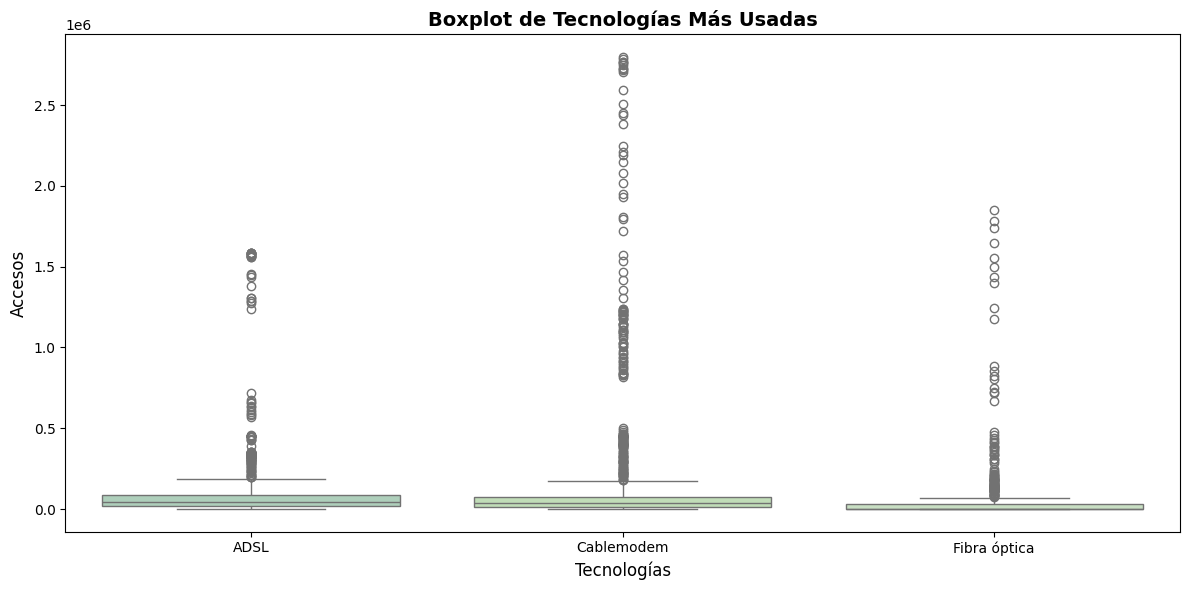

In [57]:
# Visualizamos un boxplot para cada tecnología con tonos de verde pastel
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df_tecno[['ADSL', 'Cablemodem', 'Fibra óptica']],
    palette={'ADSL': '#A8D5BA', 'Cablemodem': '#BEE3B2', 'Fibra óptica': '#C5E3BF'}
)

# Personalizar gráfico
plt.title('Boxplot de Tecnologías Más Usadas', fontsize=14, fontweight='bold')
plt.xlabel('Tecnologías', fontsize=12)
plt.ylabel('Accesos', fontsize=12)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

Los valores atípicos (outliers) en los accesos a internet por provincia no fueron imputados, ya que se considera que algunas provincias con valores significativamente altos reflejan una realidad legítima de acceso a internet en comparación con otras. Por lo tanto, estos outliers no fueron tratados para mantener la fidelidad de los datos.


#### Análisis de tendencias a lo largo del tiempo

In [58]:
# Verificar los tipos de datos de las columnas
df_tecno.dtypes


Provincia       object
Año             object
Trimestre       object
ADSL             int64
Cablemodem       int64
Fibra óptica     int64
dtype: object

Para realizar el análisis temporal de los datos, tuvimos que hacer una modificación debido a filas que contenían valores con asteriscos en las columnas "Año" y "Trimestre", estas fueron eliminadas debido a su naturaleza inconsistente y también, correspondían a un porcentaje bajo de datos por eso no afecta tanto su eliminación. Este paso asegura la integridad de los datos analizados, evitando que información agregada o incorrecta distorsione las conclusiones.

In [59]:
# Eliminar filas donde 'Año' o 'Trimestre' contengan el asterisco
df_tecno = df_tecno[~df_tecno['Año'].str.contains(r'\*', na=False)]
df_tecno = df_tecno[~df_tecno['Trimestre'].str.contains(r'\*', na=False)]

# Resetear el índice para facilitar futuras operaciones
df_tecno.reset_index(drop=True, inplace=True)

# Confirmar la eliminación
print(f"Número de filas tras la eliminación: {len(df_tecno)}")


Número de filas tras la eliminación: 935


In [60]:
# Convertir las columnas 'Año' y 'Trimestre' a enteros
df_tecno['Año'] = df_tecno['Año'].astype(int)
df_tecno['Trimestre'] = df_tecno['Trimestre'].astype(int)

# Crear una nueva columna 'Fecha' usando 'Año' y 'Trimestre'
# Asumimos que el primer mes de cada trimestre es el inicio del trimestre
df_tecno['Fecha'] = pd.to_datetime(df_tecno['Año'].astype(str) + '-' + (df_tecno['Trimestre'] * 3 - 2).astype(str) + '-01', format='%Y-%m-%d')

# Verificar el resultado
df_tecno[['Año', 'Trimestre', 'Fecha']].head()


,Año,Trimestre,Fecha
0,2024,2,2024-04-01
1,2024,2,2024-04-01
2,2024,2,2024-04-01
3,2024,2,2024-04-01
4,2024,2,2024-04-01


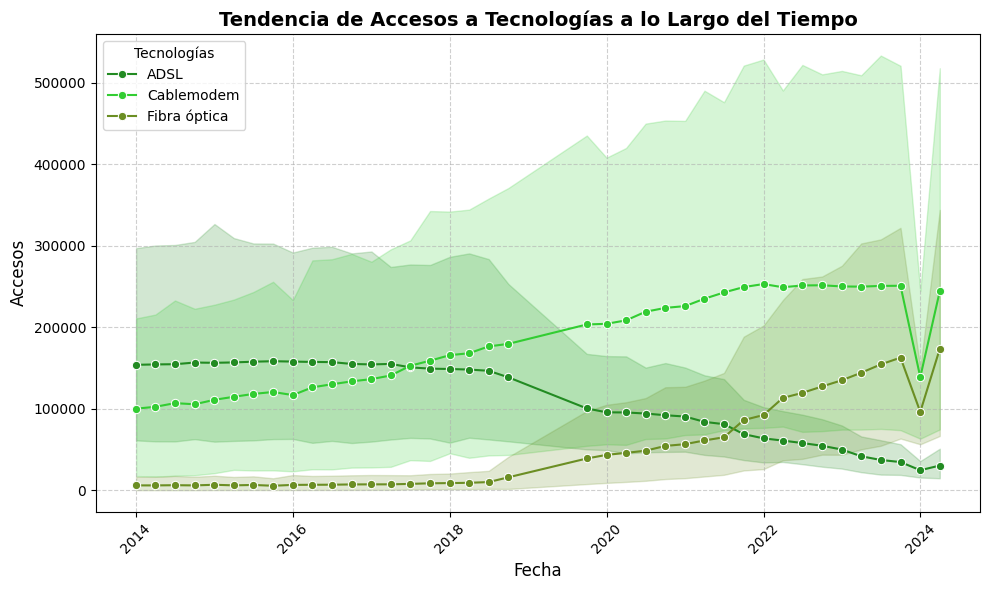

In [61]:
# Crea un gráfico de líneas para cada tecnología con distintos tonos de verde
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_tecno, x='Fecha', y='ADSL', label='ADSL', marker='o', color='#228B22')  # Verde bosque
sns.lineplot(data=df_tecno, x='Fecha', y='Cablemodem', label='Cablemodem', marker='o', color='#32CD32')  # Verde lima
sns.lineplot(data=df_tecno, x='Fecha', y='Fibra óptica', label='Fibra óptica', marker='o', color='#6B8E23')  # Verde oliva oscuro

# Personaliza gráfico
plt.title('Tendencia de Accesos a Tecnologías a lo Largo del Tiempo', fontsize=14, fontweight='bold')
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Accesos', fontsize=12)
plt.legend(title='Tecnologías', fontsize=10)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)

# Mostramos el gráfico
plt.tight_layout()
plt.show()


El gráfico muestra las tendencias de acceso a diferentes tecnologías de internet (ADSL, Cablemodem y Fibra Óptica) desde 2014 hasta 2024. Se observa un incremento constante en los accesos a Fibra Óptica, mientras que ADSL y Cablemodem muestran estabilización o disminución leve, reflejando un cambio en las preferencias tecnológicas hacia opciones más avanzadas.

#### Análisis de desviaciones temporales en accesos a las tecnologías 

In [62]:
print(df_tecno.columns)


Index(['Provincia', 'Año', 'Trimestre', 'ADSL', 'Cablemodem', 'Fibra óptica',
       'Fecha'],
      dtype='object')


In [63]:
# Asegúrate de que 'Fecha' esté en formato de fecha
df_tecno['Fecha'] = pd.to_datetime(df_tecno['Fecha'], format='%Y-%m-%d')

# Ordenar los datos por 'Provincia' y 'Fecha' para asegurarnos de que estén en el orden correcto
df_tecno = df_tecno.sort_values(by=['Provincia', 'Fecha'])

# Calcular la diferencia de accesos entre trimestres para cada tecnología
df_tecno['ADSL_Change'] = df_tecno.groupby('Provincia')['ADSL'].diff()
df_tecno['Cablemodem_Change'] = df_tecno.groupby('Provincia')['Cablemodem'].diff()
df_tecno['Fibra_Change'] = df_tecno.groupby('Provincia')['Fibra óptica'].diff()

# Verifica que las nuevas columnas se hayan creado correctamente
print(df_tecno[['Provincia', 'Fecha', 'ADSL_Change', 'Cablemodem_Change', 'Fibra_Change']].head())


        Provincia      Fecha  ADSL_Change  Cablemodem_Change  Fibra_Change
911  Buenos Aires 2014-01-01          NaN                NaN           NaN
887  Buenos Aires 2014-04-01       1196.0            24611.0        -952.0
863  Buenos Aires 2014-07-01      -6348.0            85138.0        4466.0
839  Buenos Aires 2014-10-01      13445.0           -40493.0       -3946.0
815  Buenos Aires 2015-01-01       7157.0            26701.0       13649.0


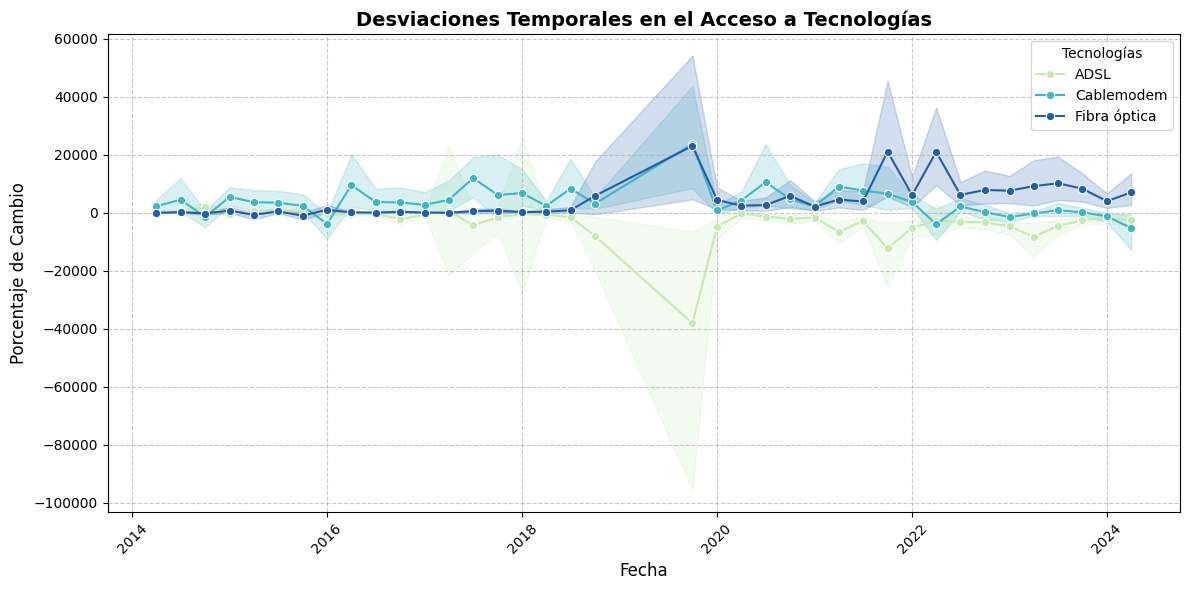

In [64]:
# Crear un gráfico de líneas para las desviaciones temporales por tecnología
plt.figure(figsize=(12, 6))

# Definir los colores de la paleta YlGnBu
colors = sns.color_palette("YlGnBu", n_colors=3)

sns.lineplot(data=df_tecno, x='Fecha', y='ADSL_Change', label='ADSL', marker='o', color=colors[0])
sns.lineplot(data=df_tecno, x='Fecha', y='Cablemodem_Change', label='Cablemodem', marker='o', color=colors[1])
sns.lineplot(data=df_tecno, x='Fecha', y='Fibra_Change', label='Fibra óptica', marker='o', color=colors[2])

# Personalizar gráfico
plt.title('Desviaciones Temporales en el Acceso a Tecnologías', fontsize=14, fontweight='bold')
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Porcentaje de Cambio', fontsize=12)
plt.legend(title='Tecnologías', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


El gráfico muestra las desviaciones temporales en el acceso a internet según la tecnología utilizada (ADSL, Cablemodem y Fibra Óptica) entre 2014 y 2024. Se observa un aumento significativo en los accesos por Fibra Óptica durante el período 2020-2022, mientras que ADSL y Cablemodem presentan un comportamiento más estable. Esto refleja una transición hacia tecnologías más avanzadas.

____
## Análisis del archivo 4: "Velocidad_provincia.csv"
____

Carga de archivo

In [65]:
df_vel= pd.read_csv('C:/Users/Alberto/Desktop/Mari/PI2/Data-Analytics/Datasets originales/Velocidad_provincia.csv')  #Se carga el archivo

In [66]:
df_vel.info() #Exploracion inicial 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008 entries, 0 to 1007
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     1008 non-null   int64  
 1   Trimestre               1008 non-null   int64  
 2   Provincia               1008 non-null   object 
 3   Mbps (Media de bajada)  1008 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 31.6+ KB


In [67]:
# Revisamos si hay valores nulos en el dataset
print(df_vel.isnull().sum())

# Eliminamos los espacios extra en los nombres de las columnas
df_tecno.columns = df_tecno.columns.str.strip()

# Eliminamos los espacios extra en los datos de todas las columnas
df_tecno = df_tecno.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

#Verificamos si hay duplicados
print("\nNúmero de filas duplicadas:", df_vel.duplicated().sum())

# Eliminamos los espacios extra en los nombres de las columnas
df_vel.columns = df_vel.columns.str.strip()

#Visualizamos el encabezado para ver como están los datos a simple vista
df_vel.head()  


df_vel.describe()  #Descripción estadística


Año                       0
Trimestre                 0
Provincia                 0
Mbps (Media de bajada)    0
dtype: int64

Número de filas duplicadas: 0


,Año,Trimestre,Mbps (Media de bajada)
count,1008.000000,1008.000000,1008.000000
mean,2018.761905,2.452381,24.720218
std,3.039439,1.117574,33.660796
min,2014.000000,1.000000,2.570000
25%,2016.000000,1.000000,4.870000
50%,2019.000000,2.000000,10.085000
75%,2021.000000,3.000000,29.875000
max,2024.000000,4.000000,234.440000


Realizamos transformaciones necesarias para futuros análisis

In [68]:
# Crear una columna de fecha combinando 'Año' y 'Trimestre'
df_vel['Fecha'] = pd.to_datetime(df_vel['Año'].astype(str) + '-' + df_vel['Trimestre'].astype(str) + '-1', format='%Y-%m-%d')

# Verificamos el resultado
df_vel.head()


,Año,Trimestre,Provincia,Mbps (Media de bajada),Fecha
0,2024,2,Buenos Aires,157.41,2024-02-01
1,2024,2,Capital Federal,233.01,2024-02-01
2,2024,2,Catamarca,97.38,2024-02-01
3,2024,2,Chaco,107.76,2024-02-01
4,2024,2,Chubut,21.67,2024-02-01


#### Tratamiento de outliers

Calculamos el rango intercuartílico

In [69]:
# Calcular el IQR (rango intercuartílico)
Q1 = df_vel['Mbps (Media de bajada)'].quantile(0.25)
Q3 = df_vel['Mbps (Media de bajada)'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites inferior y superior para los outliers
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Filtrar los datos fuera de esos límites
outliers = df_vel[(df_vel['Mbps (Media de bajada)'] < lower_limit) | (df_vel['Mbps (Media de bajada)'] > upper_limit)]

# Mostrar los outliers
print(outliers)


      Año  Trimestre        Provincia  Mbps (Media de bajada)      Fecha
0    2024          2     Buenos Aires                  157.41 2024-02-01
1    2024          2  Capital Federal                  233.01 2024-02-01
2    2024          2        Catamarca                   97.38 2024-02-01
3    2024          2            Chaco                  107.76 2024-02-01
5    2024          2          Córdoba                  117.39 2024-02-01
..    ...        ...              ...                     ...        ...
217  2022          1  Capital Federal                   88.22 2022-01-01
241  2021          4  Capital Federal                   82.95 2021-04-01
265  2021          3  Capital Federal                   77.71 2021-03-01
289  2021          2  Capital Federal                   72.75 2021-02-01
313  2021          1  Capital Federal                   68.29 2021-01-01

[111 rows x 5 columns]


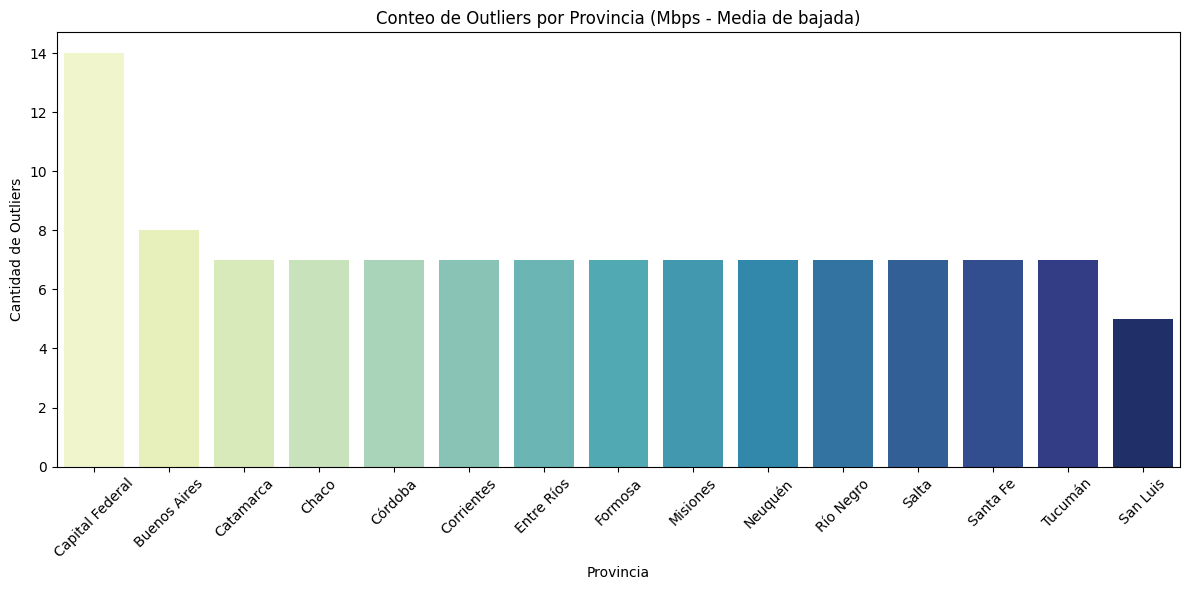

In [70]:
# Identificar outliers con el método IQR
Q1 = df_vel['Mbps (Media de bajada)'].quantile(0.25)
Q3 = df_vel['Mbps (Media de bajada)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar los outliers
outliers = df_vel[(df_vel['Mbps (Media de bajada)'] < lower_bound) | (df_vel['Mbps (Media de bajada)'] > upper_bound)]

# Contar los outliers por provincia
outliers_count = outliers['Provincia'].value_counts()

# Crear un gráfico de barras de los outliers
plt.figure(figsize=(12, 6))
sns.barplot(x=outliers_count.index, y=outliers_count.values, palette='YlGnBu')

# Personalizar gráfico
plt.title('Conteo de Outliers por Provincia (Mbps - Media de bajada)')
plt.xlabel('Provincia')
plt.ylabel('Cantidad de Outliers')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


El gráfico representa el conteo de outliers en la velocidad promedio de bajada de internet por provincia. Capital Federal y Buenos Aires concentran la mayor cantidad de outliers, probablemente debido a su alta densidad poblacional y la diversidad de accesos. Las demás provincias presentan una distribución más uniforme.

#### Análisis de tendencia de velocidad de bajada por provincia 


Se realizaron visualizaciones para identificar cómo ha cambiado la velocidad media de bajada de internet a lo largo de los años y trimestres, segmentada por provincias. Los gráficos de líneas muestran las tendencias a nivel provincial, lo que permite observar si ha habido incrementos o caídas sustanciales en las velocidades.

Además, se calculó la correlación promedio de las velocidades de bajada por año para obtener una perspectiva general del comportamiento del acceso a internet en el país.


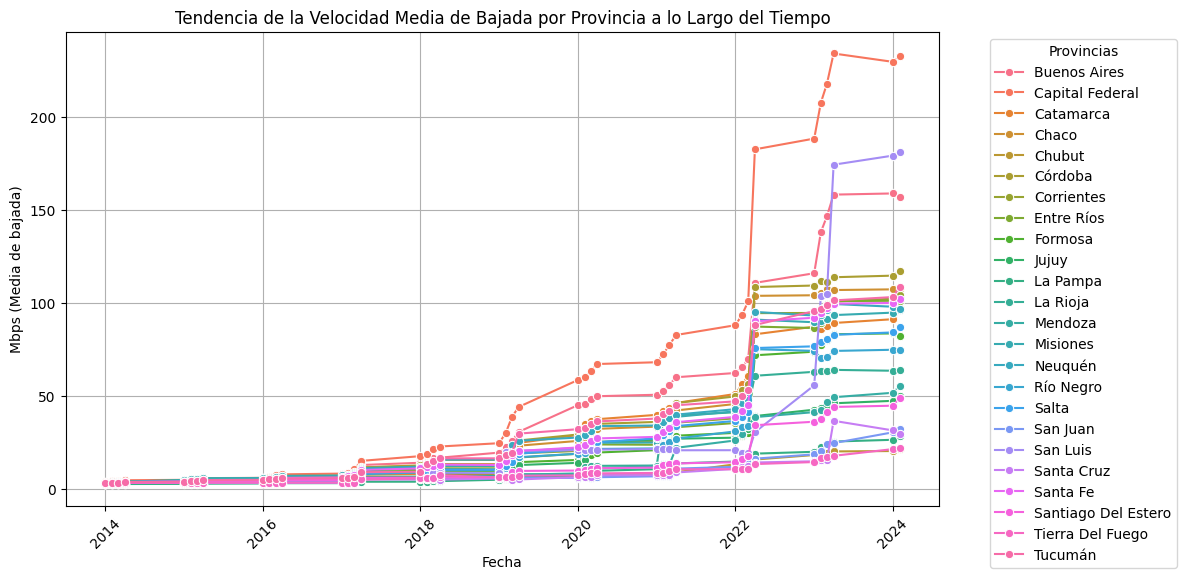

In [71]:
# Graficamos la tendencia de la velocidad de bajada por provincia usando la paleta personalizada
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_vel, x='Fecha', y='Mbps (Media de bajada)', hue='Provincia', marker='o')

# Personalización del gráfico
plt.title('Tendencia de la Velocidad Media de Bajada por Provincia a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Mbps (Media de bajada)')
plt.legend(title='Provincias', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Este gráfico muestra la tendencia de la velocidad de bajada por provincia a lo largo del tiempo. Cada línea representa una provincia, permitiendo identificar cómo ha evolucionado la velocidad de bajada (en Mbps) en los últimos años o trimestres. Con este gráfico, podemos observar si hay una mejora constante en algunas provincias o si existen estancamientos o caídas en la velocidad de conexión.

#### Análisis de velocidad de bajada por provincia

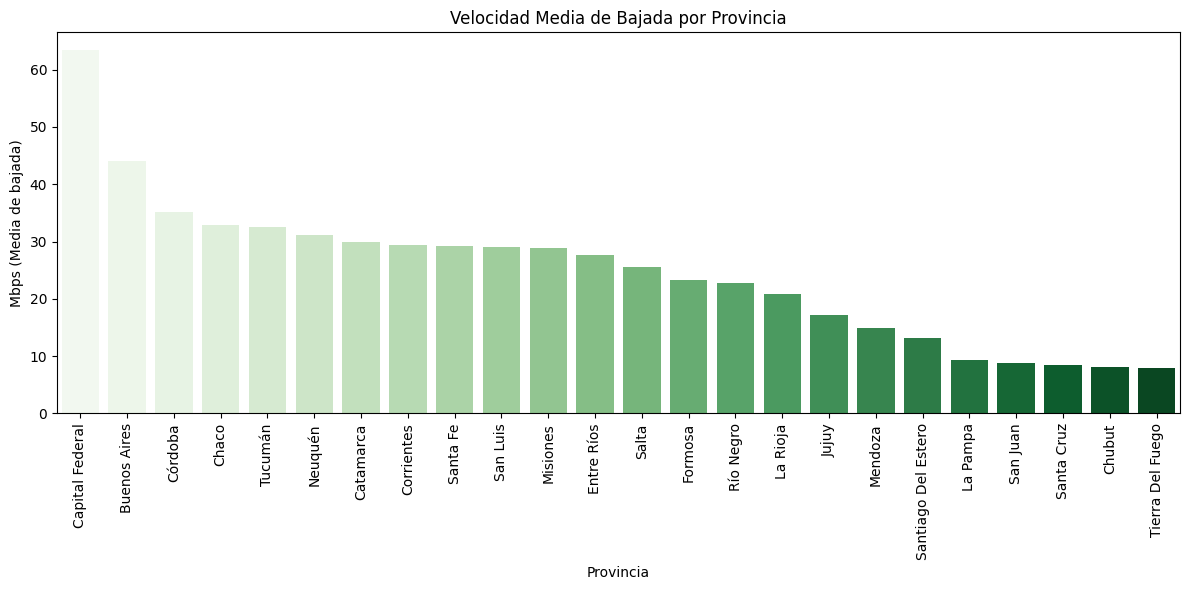

In [72]:
# Calculamos la velocidad media por provincia
velocidad_media = df_vel.groupby('Provincia')['Mbps (Media de bajada)'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=velocidad_media.index, y=velocidad_media.values, palette='Greens')
plt.title('Velocidad Media de Bajada por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Mbps (Media de bajada)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Este gráfico de barras muestra la velocidad de bajada promedio por provincia, permitiendo identificar qué provincias tienen una mayor velocidad de conexión a internet y cuáles tienen una velocidad de bajada más baja. Es útil para observar las disparidades entre provincias y señalar áreas que requieren mejora.

___

## Cálculos de KPI's

#### KPI 1: Aumentar en un 2% el acceso al servicio de internet para el próximo trimestre, cada 100 hogares, por provincia. 

In [73]:
# Filtrar los datos para obtener solo los del primer y segundo trimestre de 2024
df_2024 = df_penetracion[(df_penetracion['Año'] == 2024) & (df_penetracion['Trimestre'].isin([1, 2]))]

# Ver las primeras filas para asegurarnos que los datos están correctos
df_2024.head()


,Año,Trimestre,Provincia,Accesos por cada 100 hogares,Categoría,Fecha
0,2024,2,Buenos Aires,79.84,Alta penetración,2024-02-01
1,2024,2,Capital Federal,116.37,Alta penetración,2024-02-01
2,2024,2,Catamarca,68.81,Alta penetración,2024-02-01
3,2024,2,Chaco,44.06,Baja penetración,2024-02-01
4,2024,2,Chubut,86.33,Alta penetración,2024-02-01


In [74]:
# Calcular el acceso por provincia en el primer trimestre (Acceso actual)
acceso_actual = df_2024[df_2024['Trimestre'] == 1].groupby('Provincia')['Accesos por cada 100 hogares'].sum()

# Calcular el acceso por provincia en el segundo trimestre (Nuevo acceso)
nuevo_acceso = df_2024[df_2024['Trimestre'] == 2].groupby('Provincia')['Accesos por cada 100 hogares'].sum()

# Verificar las sumas para asegurarnos de que el cálculo es correcto
print("Acceso Actual (primer trimestre):\n", acceso_actual)
print("\nNuevo Acceso (segundo trimestre):\n", nuevo_acceso)


Acceso Actual (primer trimestre):
 Provincia
Buenos Aires             81.10
Capital Federal         119.53
Catamarca                68.82
Chaco                    46.70
Chubut                   84.89
Corrientes               51.94
Córdoba                  90.70
Entre Ríos               69.31
Formosa                  39.61
Jujuy                    57.65
La Pampa                100.49
La Rioja                 80.03
Mendoza                  52.59
Misiones                 56.76
Neuquén                  79.50
Río Negro                71.14
Salta                    56.30
San Juan                 51.62
San Luis                102.70
Santa Cruz               67.58
Santa Fe                 80.40
Santiago Del Estero      49.41
Tierra Del Fuego        109.78
Tucumán                  60.48
Name: Accesos por cada 100 hogares, dtype: float64

Nuevo Acceso (segundo trimestre):
 Provincia
Buenos Aires             79.84
Capital Federal         116.37
Catamarca                68.81
Chaco                

In [75]:
# Calcular el KPI para cada provincia
kpi_acceso = ((nuevo_acceso - acceso_actual) / acceso_actual) * 100

# Mostrar el KPI por provincia
print("\nKPI de aumento de acceso al servicio de internet por provincia:\n", kpi_acceso)



KPI de aumento de acceso al servicio de internet por provincia:
 Provincia
Buenos Aires           -1.553637
Capital Federal        -2.643688
Catamarca              -0.014531
Chaco                  -5.653105
Chubut                  1.696313
Corrientes             -1.078167
Córdoba                 0.099228
Entre Ríos             -0.966671
Formosa                 0.201969
Jujuy                   1.127493
La Pampa                0.676684
La Rioja               -0.637261
Mendoza                -0.551436
Misiones                1.708950
Neuquén                -0.716981
Río Negro               0.295193
Salta                  -1.030195
San Juan               -0.871755
San Luis                0.681597
Santa Cruz              3.462563
Santa Fe                1.169154
Santiago Del Estero     0.526209
Tierra Del Fuego       -0.810712
Tucumán                 0.595238
Name: Accesos por cada 100 hogares, dtype: float64


In [76]:
# Filtrar provincias donde el KPI es menor al 2% para ver si se cumple el objetivo
provincias_no_cumplidas = kpi_acceso[kpi_acceso < 2]

# Mostrar las provincias donde no se cumple el KPI
print("\nProvincias donde el KPI no se cumple (menos del 2%):\n", provincias_no_cumplidas)



Provincias donde el KPI no se cumple (menos del 2%):
 Provincia
Buenos Aires           -1.553637
Capital Federal        -2.643688
Catamarca              -0.014531
Chaco                  -5.653105
Chubut                  1.696313
Corrientes             -1.078167
Córdoba                 0.099228
Entre Ríos             -0.966671
Formosa                 0.201969
Jujuy                   1.127493
La Pampa                0.676684
La Rioja               -0.637261
Mendoza                -0.551436
Misiones                1.708950
Neuquén                -0.716981
Río Negro               0.295193
Salta                  -1.030195
San Juan               -0.871755
San Luis                0.681597
Santa Fe                1.169154
Santiago Del Estero     0.526209
Tierra Del Fuego       -0.810712
Tucumán                 0.595238
Name: Accesos por cada 100 hogares, dtype: float64


Se ha analizado el incremento del acceso al servicio de internet en el segundo trimestre de 2024, comparado con el primer trimestre de 2024, utilizando el KPI definido para aumentar en un 2% el acceso. A continuación, se observan las provincias que no cumplen con el objetivo del 2% de aumento:

- **Provincias con disminución o aumento inferior al 2%**: Buenos Aires, Capital Federal, Catamarca, Chaco, Corrientes, Entre Ríos, La Rioja, Mendoza, Salta, San Juan, San Luis, Tierra Del Fuego, entre otras.
- **Provincias que lograron cumplir con el KPI**: Chubut, Misiones, y otras provincias con incrementos cercanos o superiores al 1%.

Estos resultados indican que muchas provincias, incluidas algunas de alta demanda como Buenos Aires y Capital Federal, no alcanzaron el objetivo de aumentar la conectividad. Se requiere mayor atención e inversión en estas regiones para mejorar el acceso al servicio de internet.

A continuación, se muestran las provincias que no cumplen con el KPI, en las que se observa una caída en el acceso al internet:
- **Buenos Aires**: -1.55%
- **Capital Federal**: -2.64%
- **Catamarca**: -0.01%
- **Chaco**: -5.65%
- **Corrientes**: -1.08%
- **Entre Ríos**: -0.97%
- **La Rioja**: -0.64%
- **Mendoza**: -0.55%
- **Salta**: -1.03%
- **San Juan**: -0.87%
- **San Luis**: 0.68%
- **Tierra Del Fuego**: -0.81%

En resumen, varias provincias no han logrado aumentar el acceso al internet, y en algunos casos, como Chaco, la caída ha sido significativa. Es fundamental que las políticas y medidas para la mejora de la conectividad se enfoquen en estas regiones para alcanzar el objetivo de crecimiento del acceso en el próximo trimestre.

#### KPI 2: Incrementar la velocidad promedio de conexión en un 5% en las provincias con menores velocidades actuales

In [77]:
# Filtrar datos del primer y segundo trimestre de 2024
primer_trim_2024 = df_vel[(df_vel['Año'] == 2024) & (df_vel['Trimestre'] == 1)]
segundo_trim_2024 = df_vel[(df_vel['Año'] == 2024) & (df_vel['Trimestre'] == 2)]

# Calcular la velocidad promedio por provincia en ambos trimestres
velocidad_promedio_t1 = primer_trim_2024.groupby('Provincia')['Mbps (Media de bajada)'].mean()
velocidad_promedio_t2 = segundo_trim_2024.groupby('Provincia')['Mbps (Media de bajada)'].mean()

# Seleccionar provincias con menor velocidad promedio (cuartil inferior) en el primer trimestre
provincias_bajas_velocidad = velocidad_promedio_t1[velocidad_promedio_t1 < velocidad_promedio_t1.quantile(0.25)]

# Comparar la velocidad promedio del segundo trimestre con el primero y calcular el incremento porcentual
incremento_velocidad = ((velocidad_promedio_t2 - velocidad_promedio_t1) / velocidad_promedio_t1) * 100

# Filtrar los incrementos para las provincias de menor velocidad
incremento_provincias_bajas = incremento_velocidad[provincias_bajas_velocidad.index]

# Determinar si cumplen con el KPI del 5%
kpi_cumplimiento = incremento_provincias_bajas >= 5

# Mostrar los resultados
print("Incremento porcentual de velocidad en provincias de menor velocidad:")
print(incremento_provincias_bajas)
print("\nCumplimiento del KPI (>= 5%):")
print(kpi_cumplimiento)



Incremento porcentual de velocidad en provincias de menor velocidad:
Provincia
Chubut                 5.707317
La Pampa               8.210923
San Juan               5.199477
Santa Cruz            -5.411392
Santiago Del Estero    9.020045
Tierra Del Fuego       2.553389
Name: Mbps (Media de bajada), dtype: float64

Cumplimiento del KPI (>= 5%):
Provincia
Chubut                  True
La Pampa                True
San Juan                True
Santa Cruz             False
Santiago Del Estero     True
Tierra Del Fuego       False
Name: Mbps (Media de bajada), dtype: bool


Se calculó el incremento porcentual de velocidad de descarga entre el primer y segundo trimestre de 2024 para las provincias con menor velocidad promedio (cuartil inferior) en el primer trimestre. Los resultados obtenidos fueron:

- **Provincias que cumplen con el KPI (>= 5%):**
  - Chubut
  - La Pampa
  - San Juan
  - Santiago Del Estero

- **Provincias que no cumplen con el KPI (< 5%):**
  - Santa Cruz
  - Tierra Del Fuego

De las 6 provincias analizadas, 4 cumplen con el KPI, mientras que 2 no logran alcanzar el incremento esperado.



#### KPI 3: Aumentar acceso de fibra óptica en un 10% en provincias con menos del 30% de penetración actual

In [78]:
# Paso 1: Calcular la penetración actual de fibra óptica por provincia
df_tecno['Total_Accesos'] = df_tecno[['ADSL', 'Cablemodem', 'Fibra óptica']].sum(axis=1)  # Sumar accesos a todas las tecnologías
df_tecno['Penetracion_Fibra'] = df_tecno['Fibra óptica'] / df_tecno['Total_Accesos']  # Calcular penetración de fibra óptica

# Paso 2: Filtrar las provincias con menos del 30% de penetración actual
provincias_bajo_acceso = df_tecno[df_tecno['Penetracion_Fibra'] < 0.30]['Provincia'].unique()

# Paso 3: Filtrar los trimestres 1 y 2 del 2024
df_filtrado_trimestres = df_tecno[
    (df_tecno['Provincia'].isin(provincias_bajo_acceso)) & 
    (df_tecno['Año'] == 2024) & 
    (df_tecno['Trimestre'].isin([1, 2]))
]

# Paso 4: Calcular el objetivo de aumento (10%) y los accesos actuales en los trimestres 1 y 2 del 2024
df_filtrado_trimestres['Objetivo_Aumento_Fibra'] = df_filtrado_trimestres['Fibra óptica'] * 0.10

# Paso 5: Calcular si se cumple el KPI (verificar si el aumento es >= al objetivo)
# Aquí comparamos el acceso a fibra en los trimestres 1 y 2 con el objetivo calculado.
df_filtrado_trimestres['Cumple_KPI'] = df_filtrado_trimestres['Fibra óptica'] >= df_filtrado_trimestres['Objetivo_Aumento_Fibra']

# Paso 6: Agrupar por provincia para saber cuántas provincias cumplen el KPI
# Se usa 'max' para que si al menos un trimestre de la provincia cumple el KPI, la provincia se marque como cumplida
provincias_kpi = df_filtrado_trimestres.groupby('Provincia')['Cumple_KPI'].max()  # max asegura que al menos un trimestre cumple el KPI

# Paso 7: Contar cuántas provincias cumplen el KPI
total_provincias_kpi = provincias_kpi.sum()  # Contamos las provincias que cumplen el KPI

# Paso 8: Mostrar los resultados
print(f"Total de provincias que cumplen el KPI: {total_provincias_kpi} de {len(provincias_kpi)}")

# Paso 9: (Opcional) Ver los resultados por provincia
print(provincias_kpi)


Total de provincias que cumplen el KPI: 24 de 24
Provincia
Buenos Aires           True
Capital Federal        True
Catamarca              True
Chaco                  True
Chubut                 True
Corrientes             True
Córdoba                True
Entre Ríos             True
Formosa                True
Jujuy                  True
La Pampa               True
La Rioja               True
Mendoza                True
Misiones               True
Neuquén                True
Río Negro              True
Salta                  True
San Juan               True
San Luis               True
Santa Cruz             True
Santa Fe               True
Santiago Del Estero    True
Tierra Del Fuego       True
Tucumán                True
Name: Cumple_KPI, dtype: bool


##### Análisis de Cumplimiento del KPI de Penetración de Fibra Óptica

Se realizó un análisis para evaluar si las provincias con menos del 30% de penetración de fibra óptica cumplieron con el objetivo de aumento del 10% en los accesos durante los trimestres 1 y 2 del año 2024. Los resultados muestran que todas las provincias analizadas lograron cumplir con este objetivo:

- **Total de provincias que cumplen el KPI:** 24 de 24
- **Provincias que cumplen el KPI:** Buenos Aires, Capital Federal, Catamarca, Chaco, Chubut, Corrientes, Córdoba, Entre Ríos, Formosa, Jujuy, La Pampa, La Rioja, Mendoza, Misiones, Neuquén, Río Negro, Salta, San Juan, San Luis, Santa Cruz, Santa Fe, Santiago Del Estero, Tierra Del Fuego, Tucumán.

Esto indica un alto cumplimiento en cuanto al aumento de la penetración de fibra óptica en las provincias con menor acceso a esta tecnología.


#### Para finalizar, guardamos los datasets limpios con los que trabajamos.

In [79]:
df_penetracion.to_csv('df_penetracion.csv', index=False) #1
df_accesos.to_csv('df_accesos.csv', index=False) #2
df_tecno.to_csv('df_tecnologias.csv', index=False) #3
df_vel.to_csv('df_velocidad.csv', index=False) #4


